In [2]:
from SALib import ProblemSpec
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import model_selection, linear_model
import csv

import math


# Notes

https://salib.readthedocs.io/en/latest/user_guide/wrappers.html
* Wrapper
* Subprocess

In [7]:
# === Loan Default example ===
np.random.seed(298)

credit_training_features = []
credit_training_labels = [] # output?, loan default or not
attributes = []

# Get data
with open("south-german-credit-lab9.csv", "r", newline="") as file:
    data = csv.reader(file)
    attributes = next(data, None) # skip headers
    for row in data:
        features = [int(row[i]) for i in range(0,12)]
        features.append(int(row[12]) >= 35)
        [features.append(int(row[i])) for i in range(13, 20)]
        credit_training_features.append(features)
        credit_training_labels.append(int(row[20]))

print("Credit training Features: ", credit_training_features)
print("features type: ", type(credit_training_features))
print("Credit training labels: ", credit_training_labels)
print("Attributes: ", attributes)

# Get the model
x_train, x_test, y_train, y_test = model_selection.train_test_split(credit_training_features, credit_training_labels)
logistic_regression_model = linear_model.LogisticRegression(max_iter=5000).fit(x_train, y_train)
y_test_pred = logistic_regression_model.predict(x_test)
print("credit training freatures: ", len(credit_training_features))
print("x_test rows: ", len(x_test))
print("y_test_pred: ", len(y_test_pred))

# === SALib functions ===
def loan_model(X: np.ndarray, loan_data: list, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    print("input shape: ", X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(loan_data[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

Credit training Features:  [[1, 6, 4, 3, 1169, 5, 5, 4, 3, 1, 4, 1, True, 3, 2, 2, 3, 1, 2, 1], [2, 48, 2, 3, 5951, 1, 3, 2, 2, 1, 2, 1, False, 3, 2, 1, 3, 1, 1, 1], [4, 12, 4, 6, 2096, 1, 4, 2, 3, 1, 3, 1, True, 3, 2, 1, 2, 2, 1, 1], [1, 42, 2, 2, 7882, 1, 4, 2, 3, 3, 4, 2, True, 3, 3, 1, 3, 2, 1, 1], [1, 24, 3, 0, 4870, 1, 3, 3, 3, 1, 4, 4, True, 3, 3, 2, 3, 2, 1, 1], [4, 36, 2, 6, 9055, 5, 3, 2, 3, 1, 4, 4, True, 3, 3, 1, 2, 2, 2, 1], [4, 24, 2, 2, 2835, 3, 5, 3, 3, 1, 4, 2, True, 3, 2, 1, 3, 1, 1, 1], [2, 36, 2, 1, 6948, 1, 3, 2, 3, 1, 2, 3, True, 3, 1, 1, 4, 1, 2, 1], [4, 12, 2, 3, 3059, 4, 4, 2, 1, 1, 4, 1, True, 3, 2, 1, 2, 1, 1, 1], [2, 30, 4, 0, 5234, 1, 1, 4, 4, 1, 2, 3, False, 3, 2, 2, 4, 1, 1, 1], [2, 12, 2, 0, 1295, 1, 2, 3, 2, 1, 1, 3, False, 3, 1, 1, 3, 1, 1, 1], [1, 48, 2, 9, 4308, 1, 2, 3, 2, 1, 4, 2, False, 3, 1, 1, 3, 1, 1, 1], [2, 12, 2, 3, 1567, 1, 3, 1, 2, 1, 1, 3, False, 3, 2, 1, 3, 1, 2, 1], [1, 24, 4, 0, 1199, 1, 5, 4, 3, 1, 4, 3, True, 3, 2, 2, 2, 1, 1, 1], [1

# Sobol

input shape:  (22528, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.670037  0.078829
LoanDuration       0.143785  0.041076
CreditHistory      0.324953  0.065181
Purpose            0.117903  0.036795
CreditAmount       0.307699  0.052963
SavingStatus       0.238683  0.052694
EmploymentLength   0.175417  0.043239
InstallmentRate    0.287569  0.061689
PersonalStatusSex  0.186920  0.042371
Guarantors         0.028757  0.018804
ResidenceLength    0.008627  0.009894
Property           0.186920  0.048045
Age                0.109276  0.031168
OtherInstallment   0.089147  0.030578


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


input shape:  (22528, 20)
Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.664842  0.068743
LoanDuration       0.166210  0.039450
CreditHistory      0.287091  0.053971
Purpose            0.096704  0.031467
CreditAmount       0.229673  0.049614
SavingStatus       0.187365  0.044722
EmploymentLength   0.178298  0.046003
InstallmentRate    0.241761  0.049151
PersonalStatusSex  0.123902  0.040210
Guarantors         0.042308  0.020941
ResidenceLength    0.015110  0.012699
Property           0.145056  0.048006
Age                0.102748  0.033112
OtherInstallment   0.126924  0.040565


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


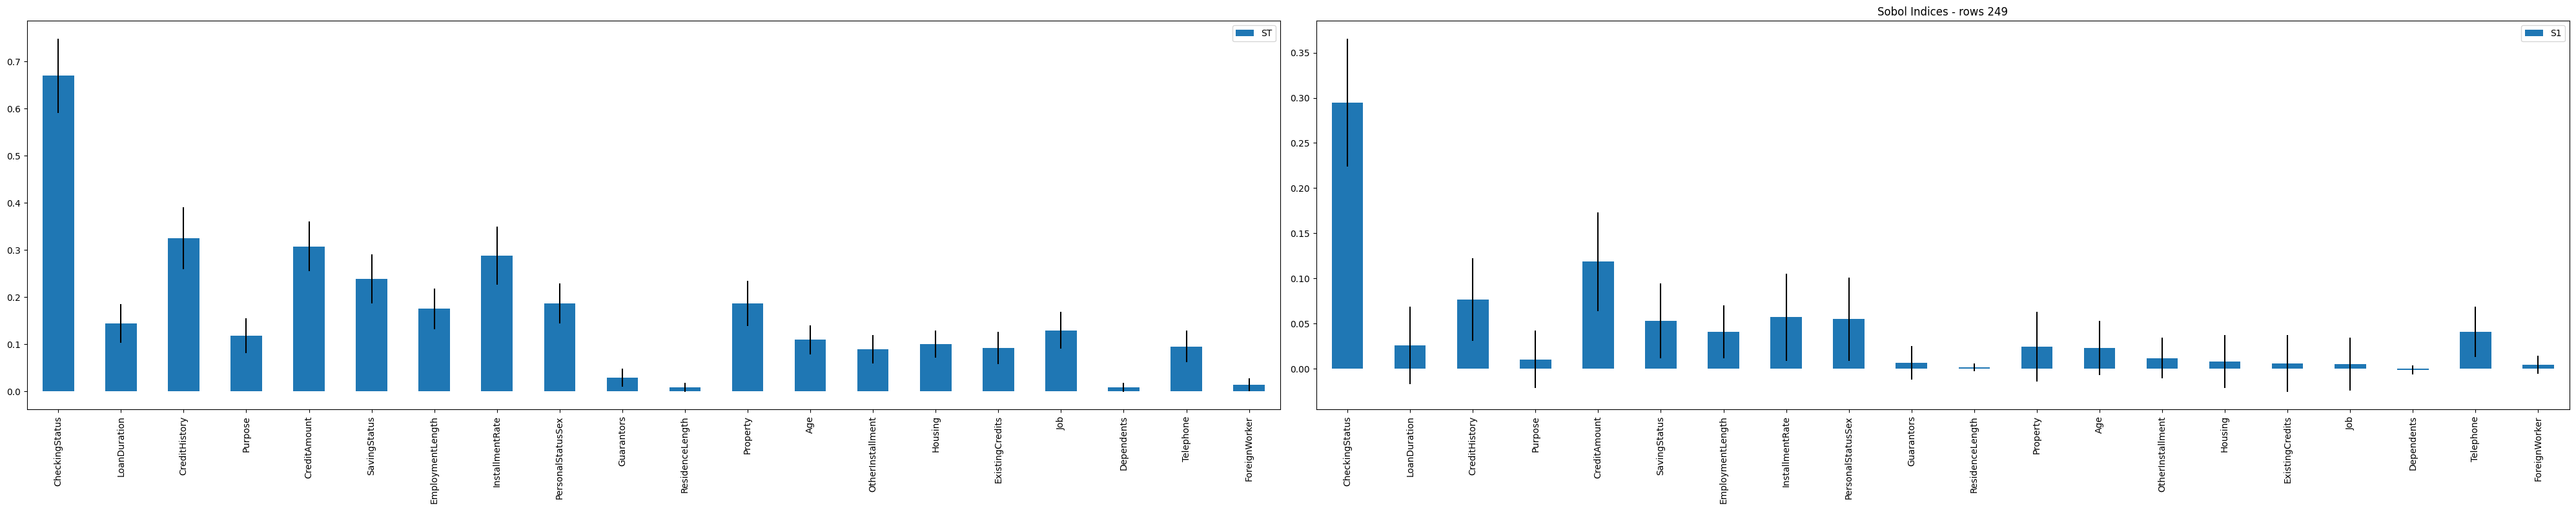

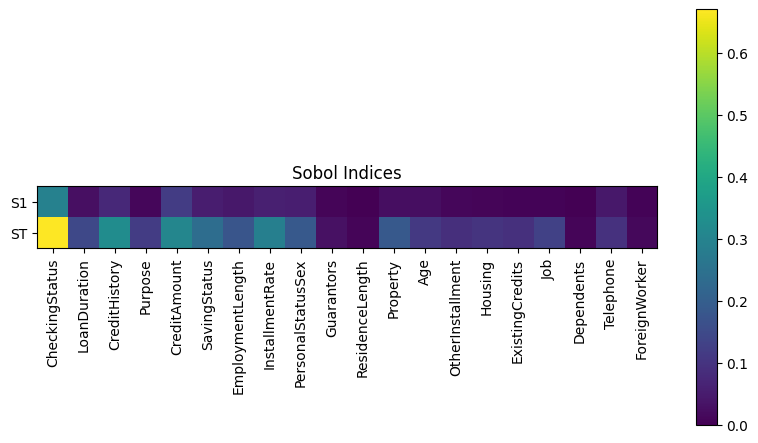

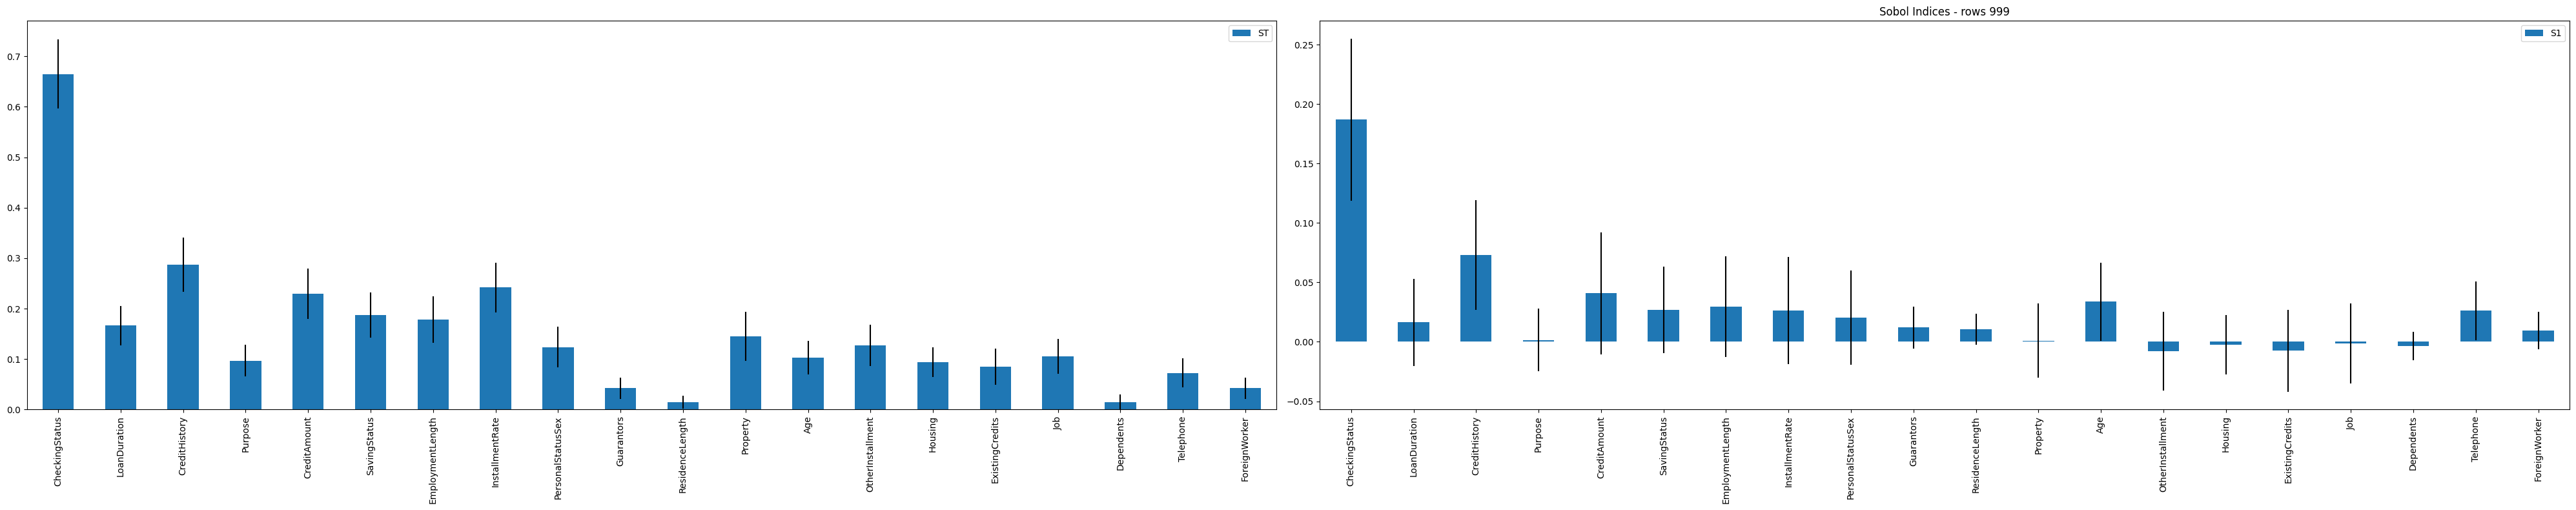

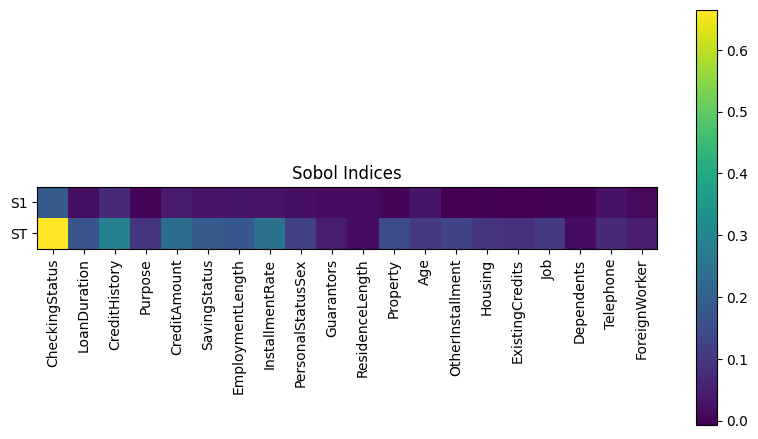

In [8]:
def loan_sobol(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_sobol(1024, calc_second_order=False).evaluate(loan_model, loan_data).analyze_sobol(calc_second_order=False))
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Sobol Indices - rows {loan_rows}")
    plt.tight_layout() 

    sp.heatmap(title="Sobol Indices")

loan_sobol(x_test)
loan_sobol(credit_training_features)


(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.658091  0.078501
LoanDuration       0.207818  0.050386
CreditHistory      0.362107  0.067145
Purpose            0.138545  0.041391
CreditAmount       0.318025  0.054973
SavingStatus       0.255049  0.053746
EmploymentLength   0.198372  0.048279
InstallmentRate    0.289686  0.053321
PersonalStatusSex  0.170033  0.048161
Guarantors         0.034636  0.023855
ResidenceLength    0.015744  0.014572
Property           0.195223  0.046835
Age                0.129099  0.042480
OtherInstallment   0.144843  0.041414
Housing            0.11650

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.655479  0.081423
LoanDuration       0.116199  0.036720
CreditHistory      0.253253  0.054170
Purpose            0.089384  0.032373
CreditAmount       0.294966  0.061551
SavingStatus       0.217500  0.049322
EmploymentLength   0.175788  0.038888
InstallmentRate    0.235377  0.054735
PersonalStatusSex  0.131096  0.036572
Guarantors         0.038733  0.018967
ResidenceLength    0.002979  0.006789
Property           0.181746  0.038216
Age                0.116199  0.033304
OtherInstallment   0.110240  0.035718
Housing            0.08044

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.641686  0.082533
LoanDuration       0.109635  0.036165
CreditHistory      0.290210  0.060461
Purpose            0.122533  0.032963
CreditAmount       0.261189  0.055791
SavingStatus       0.235392  0.059297
EmploymentLength   0.151554  0.040406
InstallmentRate    0.274087  0.062242
PersonalStatusSex  0.106410  0.033049
Guarantors         0.029021  0.021559
ResidenceLength    0.009674  0.011901
Property           0.154778  0.042785
Age                0.096737  0.034332
OtherInstallment   0.083838  0.034643
Housing            0.07416

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.639108  0.086212
LoanDuration       0.123021  0.037809
CreditHistory      0.306052  0.052203
Purpose            0.117020  0.035511
CreditAmount       0.276047  0.045050
SavingStatus       0.201034  0.047398
EmploymentLength   0.126021  0.033072
InstallmentRate    0.258044  0.059057
PersonalStatusSex  0.117020  0.039833
Guarantors         0.033006  0.019722
ResidenceLength    0.015003  0.013688
Property           0.102017  0.031684
Age                0.114019  0.035060
OtherInstallment   0.117020  0.034204
Housing            0.09001

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.626782  0.071241
LoanDuration       0.155203  0.034259
CreditHistory      0.262651  0.055666
Purpose            0.101479  0.032197
CreditAmount       0.304437  0.052955
SavingStatus       0.241759  0.050483
EmploymentLength   0.202958  0.049535
InstallmentRate    0.280559  0.059785
PersonalStatusSex  0.134310  0.032374
Guarantors         0.059693  0.027108
ResidenceLength    0.011939  0.012116
Property           0.149234  0.041327
Age                0.110433  0.034640
OtherInstallment   0.128341  0.034661
Housing            0.08058

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.644147  0.077605
LoanDuration       0.157998  0.038199
CreditHistory      0.300805  0.060057
Purpose            0.091153  0.034150
CreditAmount       0.303843  0.057745
SavingStatus       0.227882  0.053150
EmploymentLength   0.173191  0.042115
InstallmentRate    0.227882  0.049942
PersonalStatusSex  0.127614  0.036514
Guarantors         0.051653  0.022399
ResidenceLength    0.003038  0.006849
Property           0.164075  0.040746
Age                0.106345  0.035399
OtherInstallment   0.088115  0.028522
Housing            0.07292

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.617828  0.070884
LoanDuration       0.131326  0.036301
CreditHistory      0.259667  0.048805
Purpose            0.098494  0.036150
CreditAmount       0.286529  0.053854
SavingStatus       0.229820  0.052750
EmploymentLength   0.179080  0.048365
InstallmentRate    0.223851  0.045479
PersonalStatusSex  0.137295  0.039214
Guarantors         0.032831  0.017263
ResidenceLength    0.005969  0.008189
Property           0.119387  0.036989
Age                0.095510  0.033407
OtherInstallment   0.137295  0.039719
Housing            0.07760

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.634990  0.072190
LoanDuration       0.118282  0.030525
CreditHistory      0.336171  0.060830
Purpose            0.124508  0.036057
CreditAmount       0.277030  0.052515
SavingStatus       0.199212  0.051708
EmploymentLength   0.171198  0.048644
InstallmentRate    0.255241  0.051349
PersonalStatusSex  0.112057  0.035600
Guarantors         0.046690  0.022079
ResidenceLength    0.018676  0.013045
Property           0.152522  0.044748
Age                0.090268  0.034702
OtherInstallment   0.102719  0.033984
Housing            0.10583

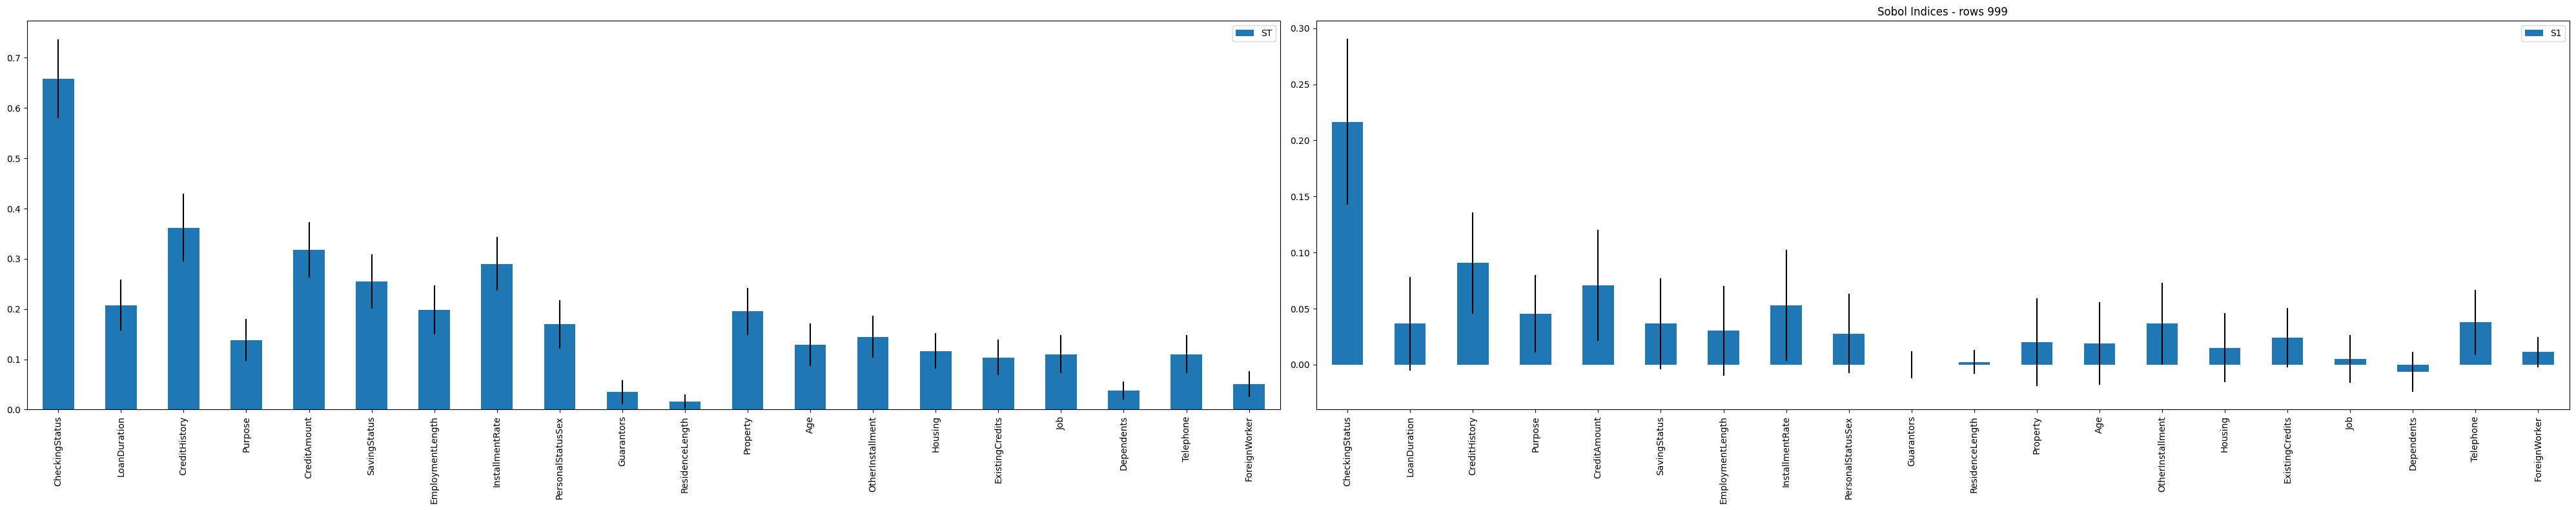

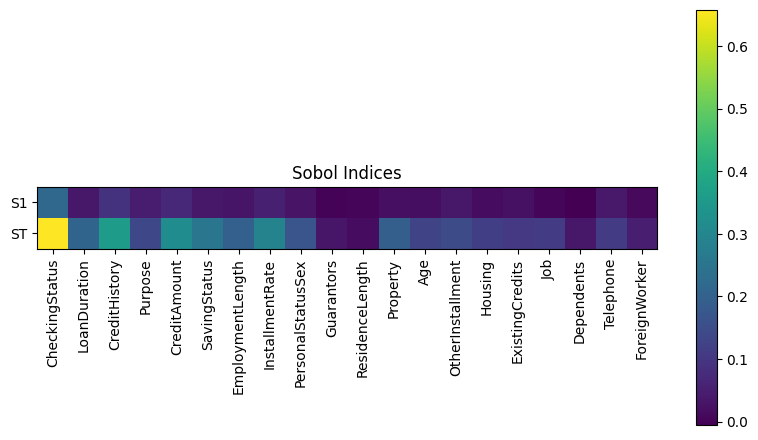

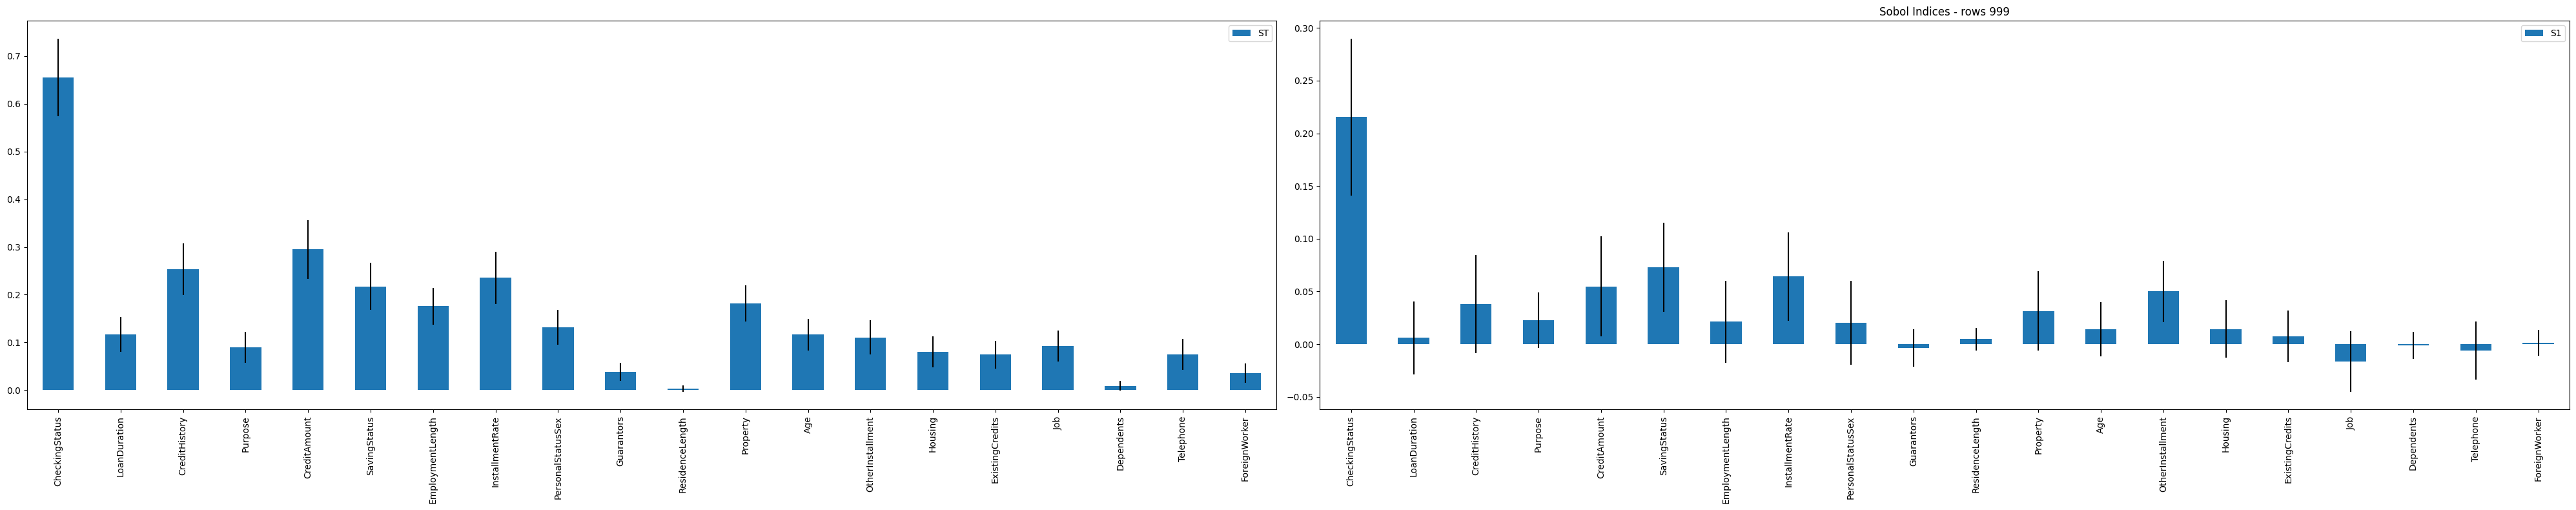

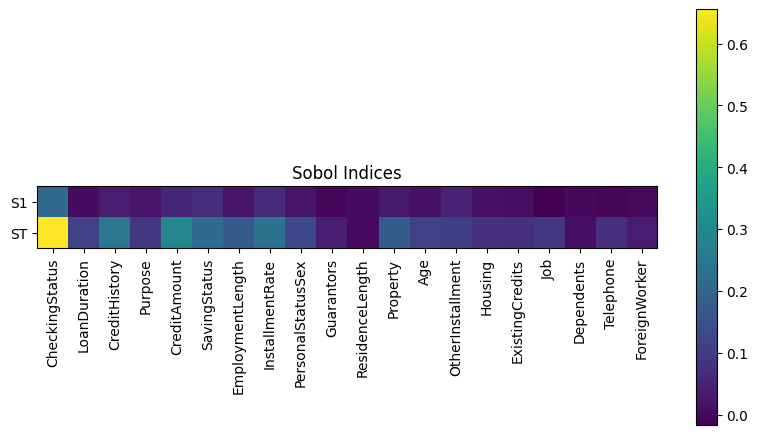

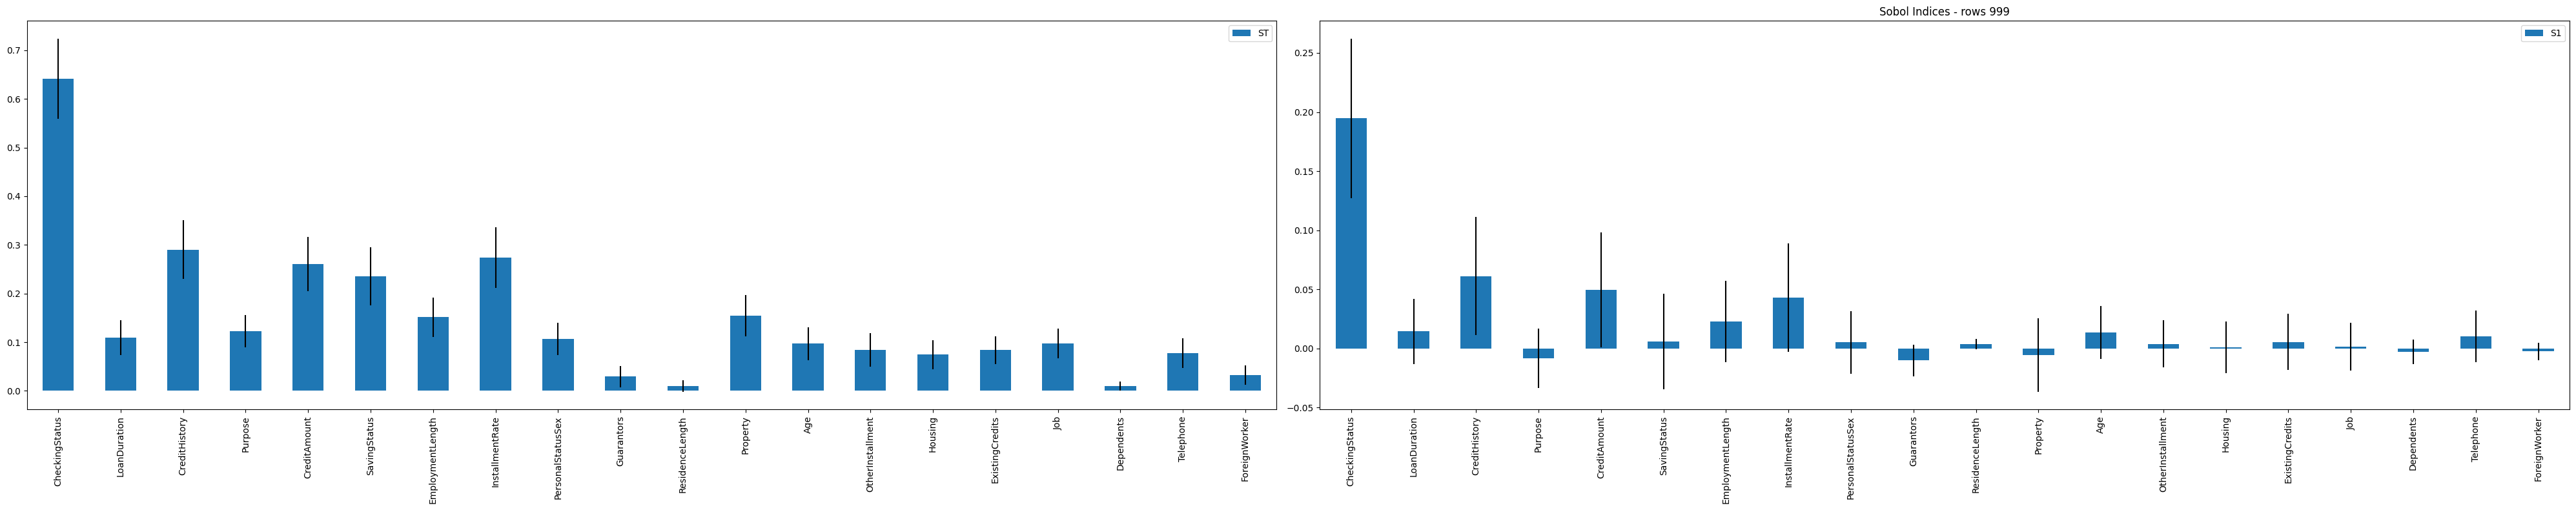

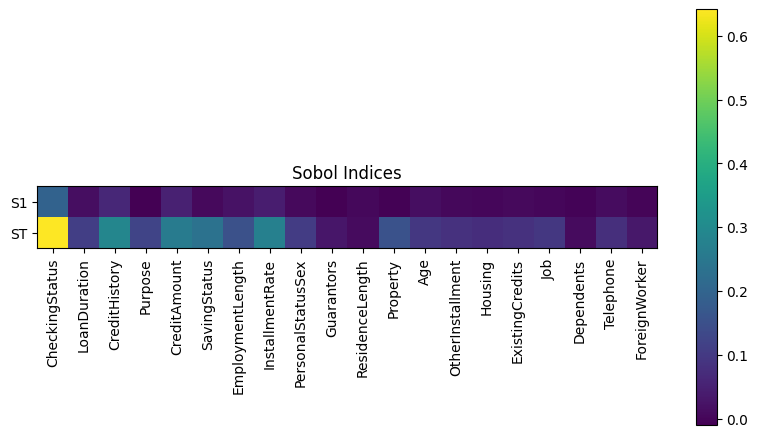

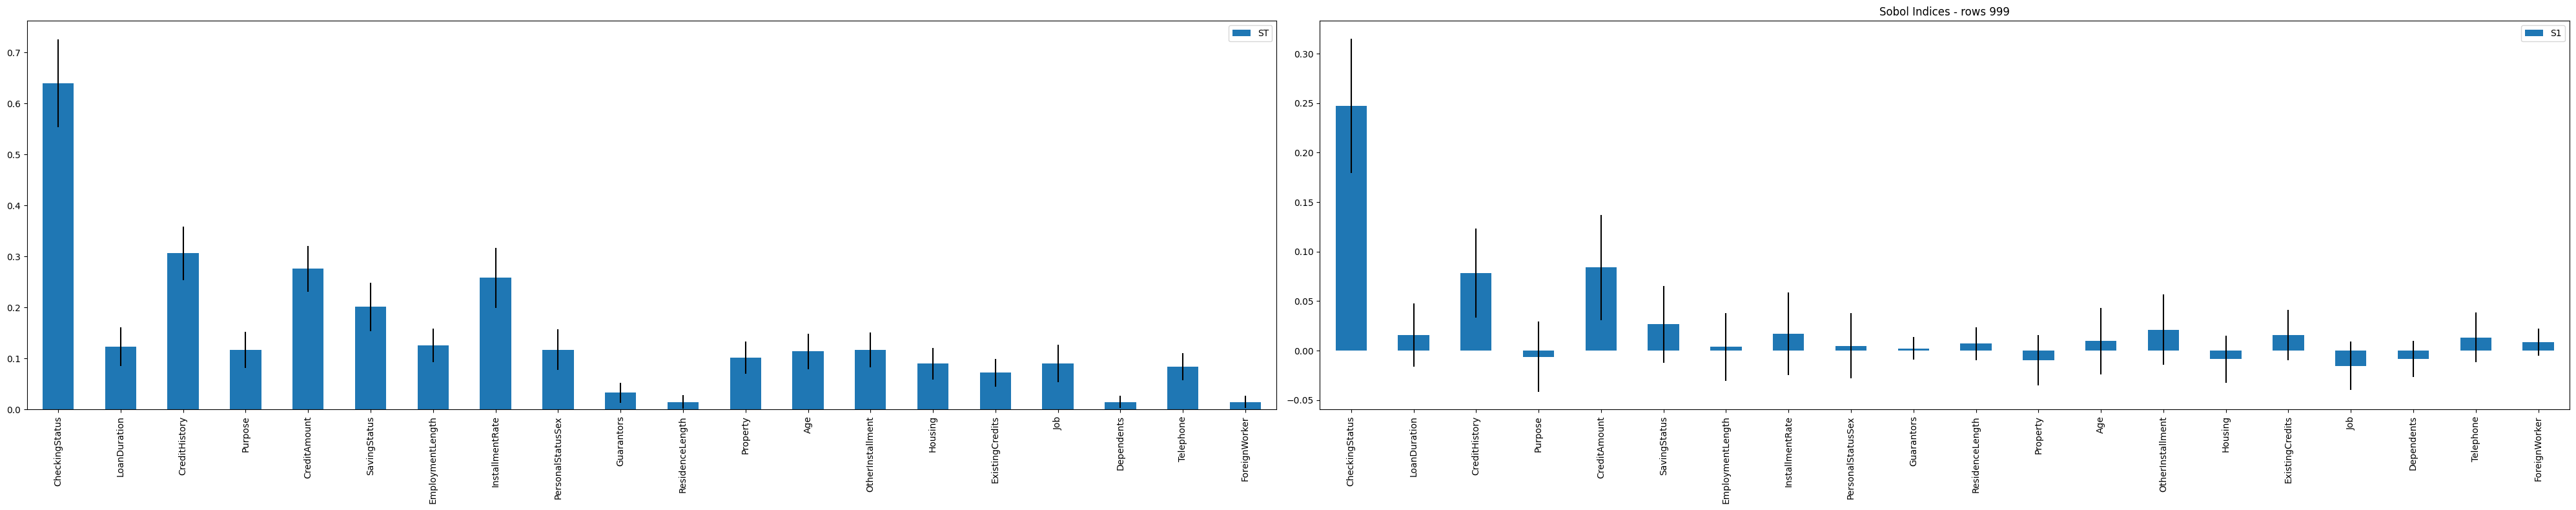

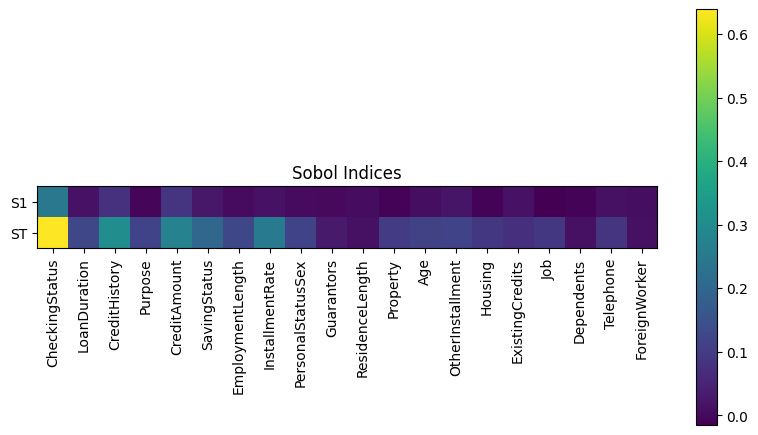

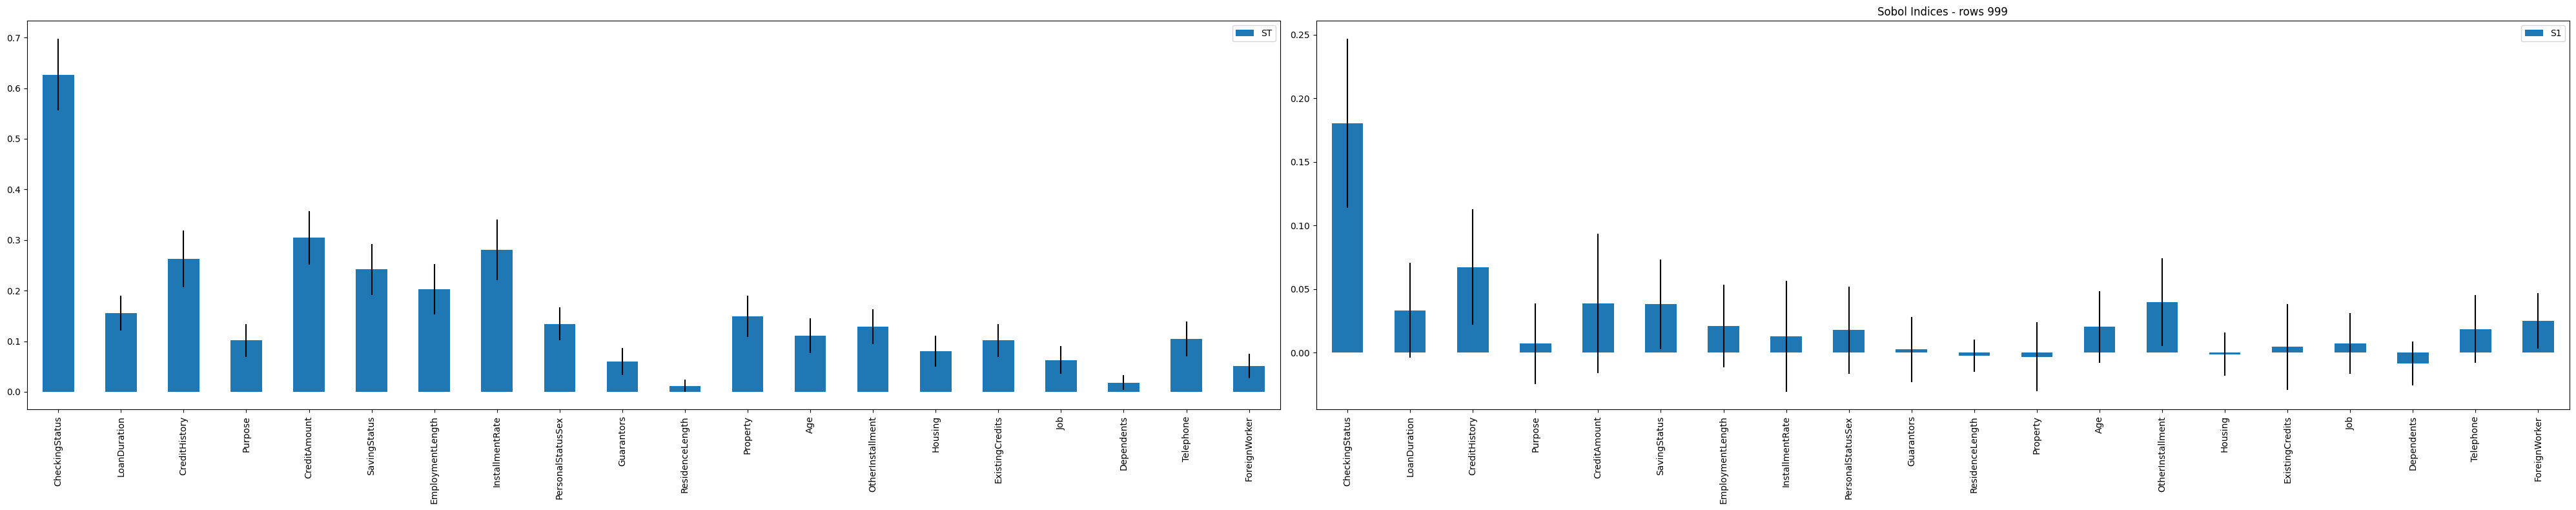

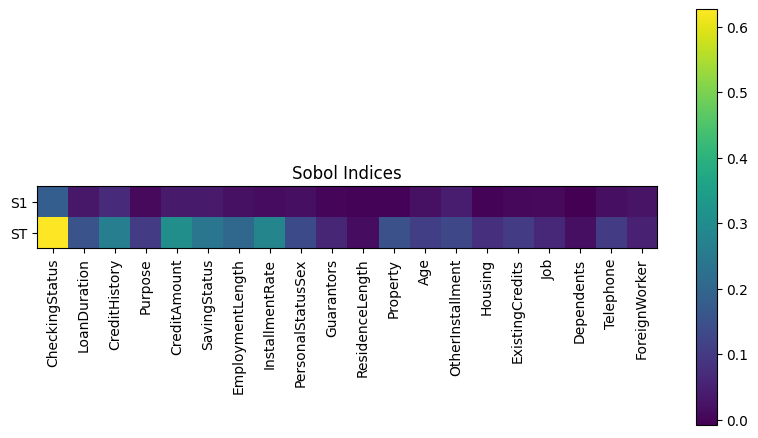

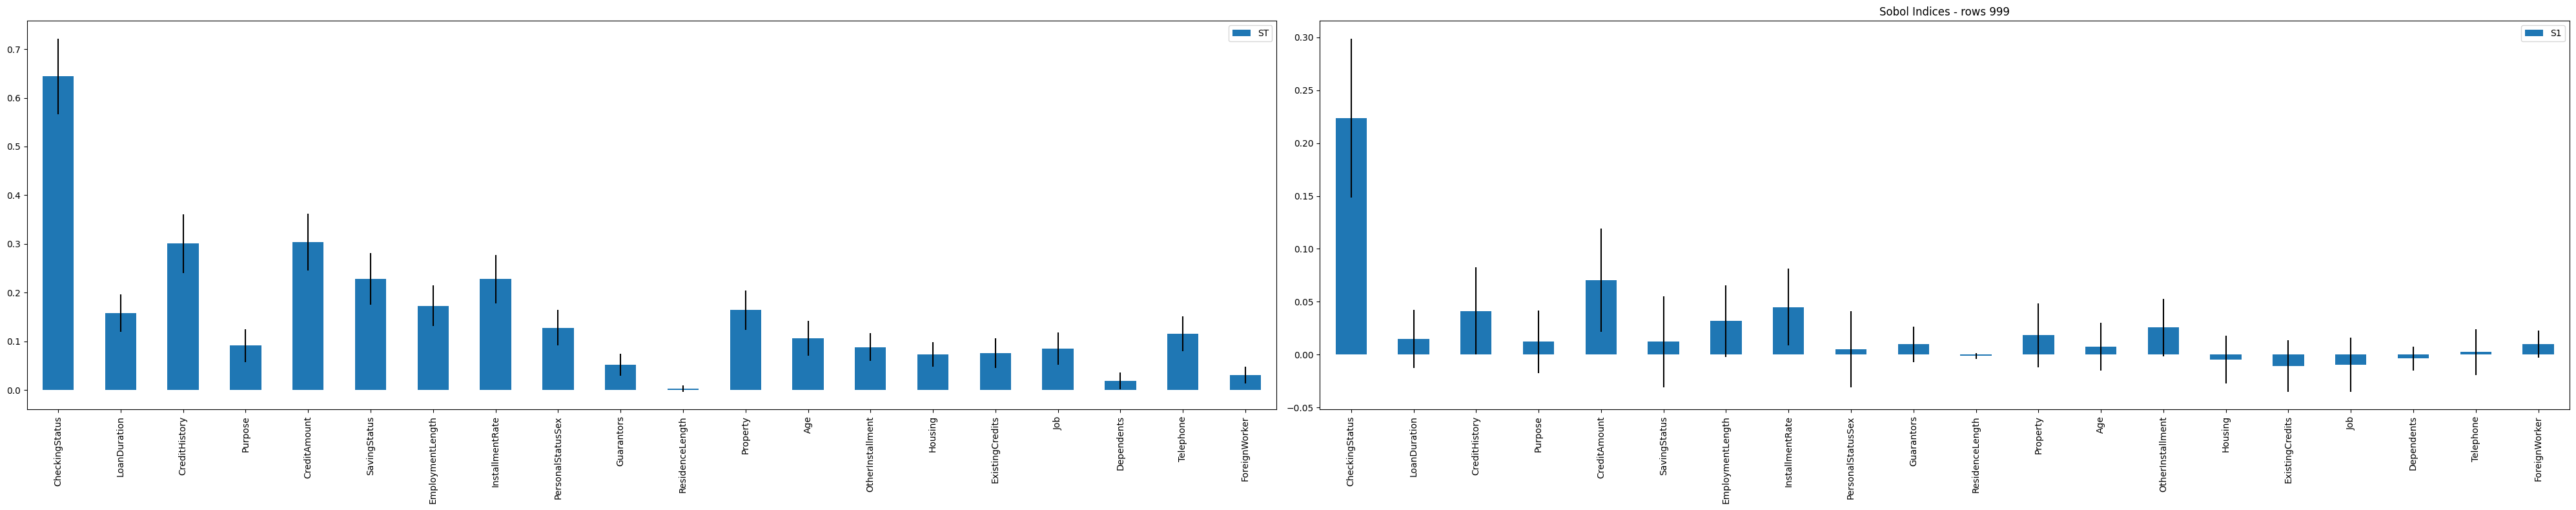

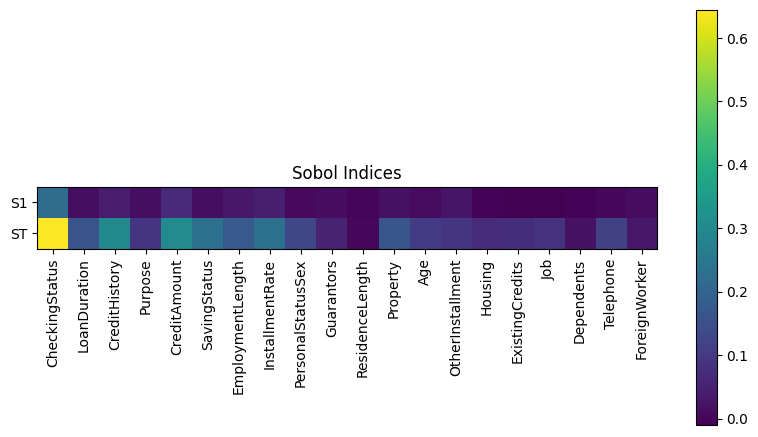

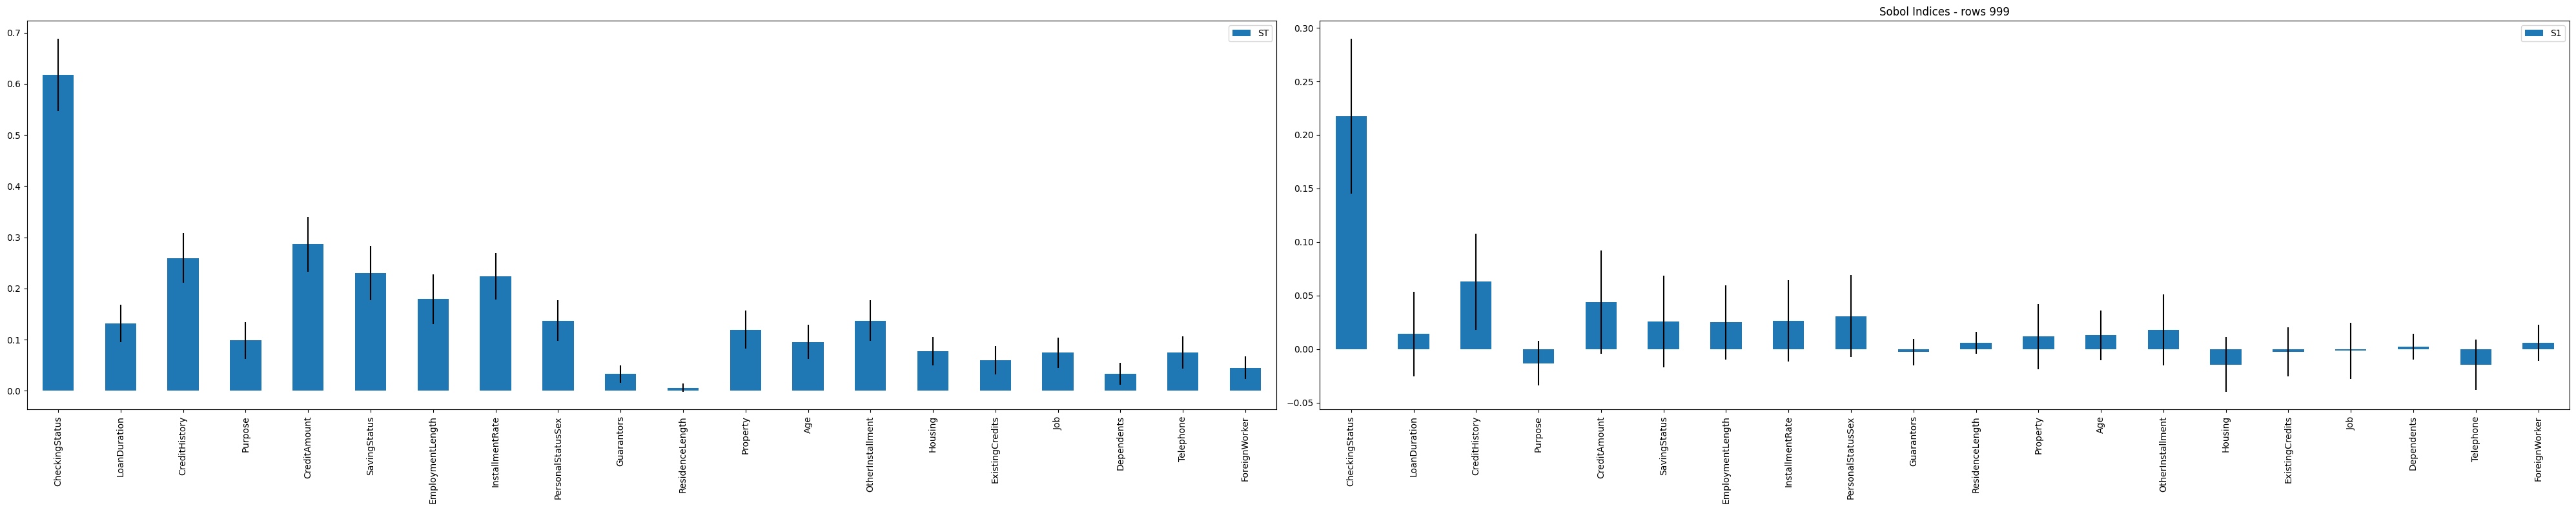

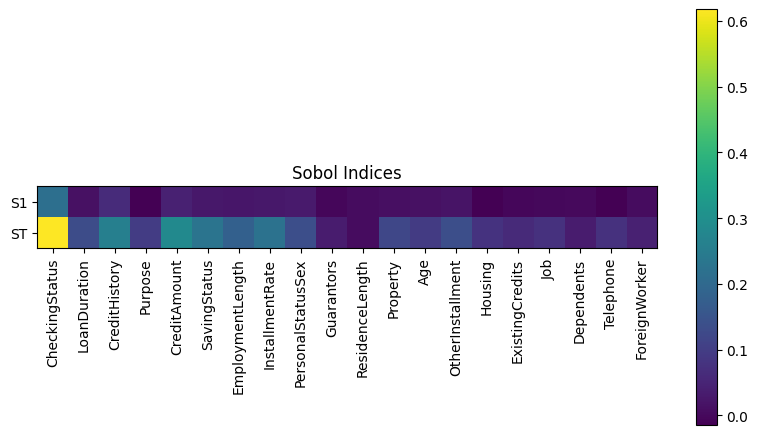

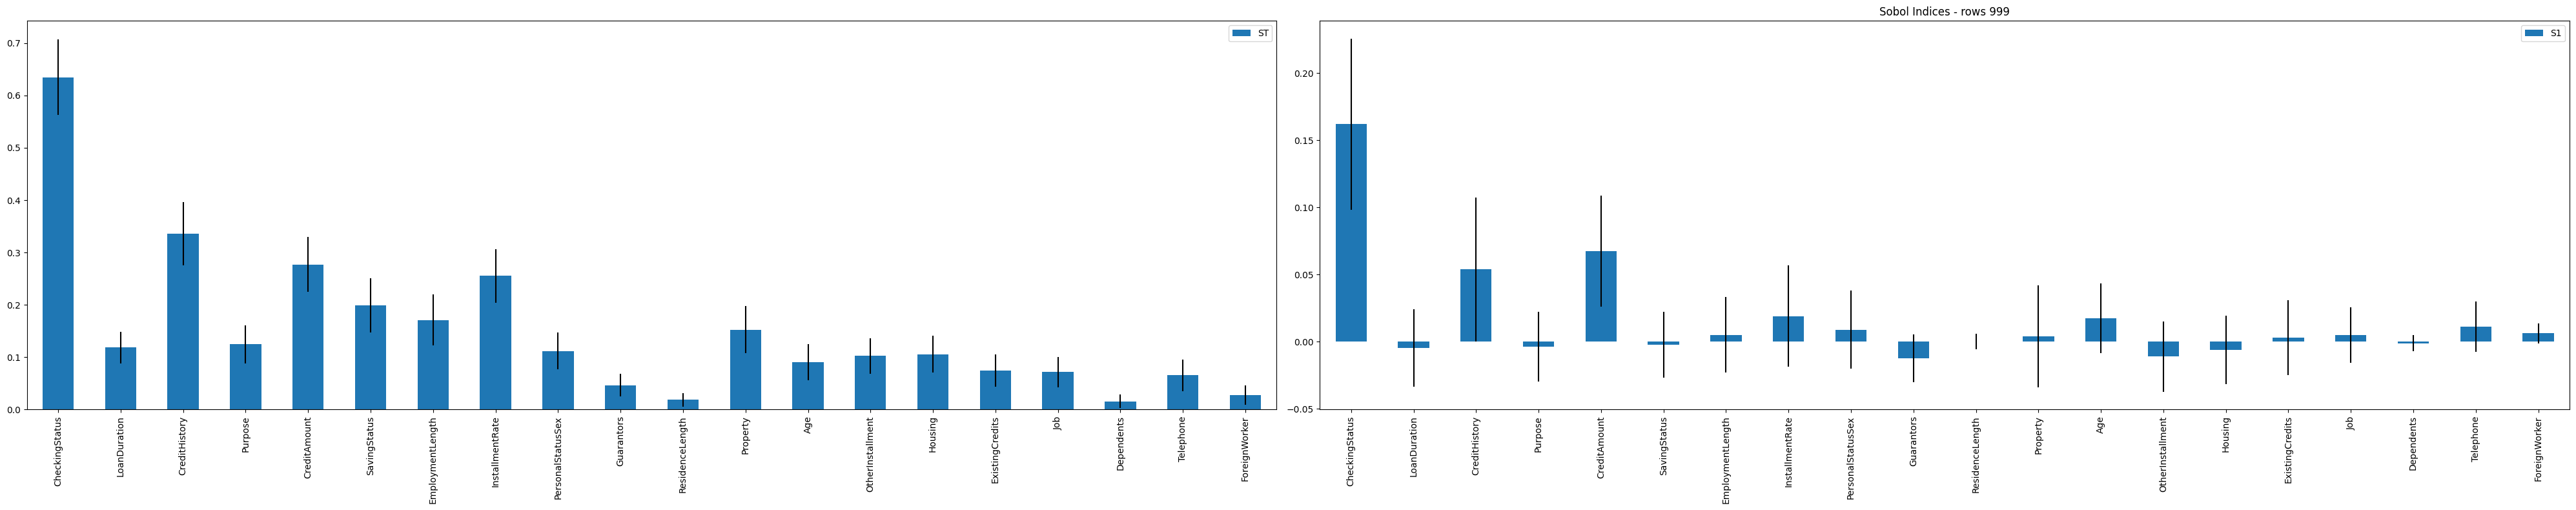

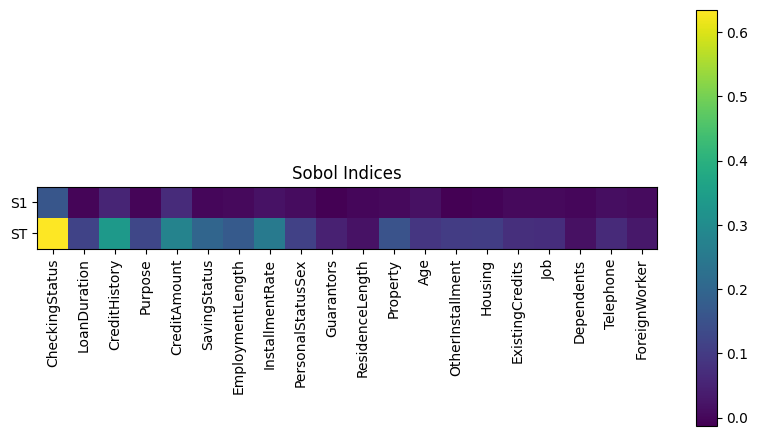

In [74]:
%%timeit
loan_sobol(credit_training_features)

# PAWN

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.002882  0.029719  0.021378  0.079909  0.821451
LoanDuration       0.000780  0.007026  0.006444  0.012986  0.490776
CreditHistory      0.001051  0.006263  0.004866  0.019361  0.805290
Purpose            0.000849  0.010811  0.011155  0.023132  0.527029
CreditAmount       0.003120  0.016049  0.011460  0.032177  0.619472
SavingStatus       0.000136  0.009665  0.006256  0.033816  1.008784
EmploymentLength   0.003596  0.011332  0.010087  0.030346  0.614313
InstallmentRate    0.002204  0.010593  0.009443  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


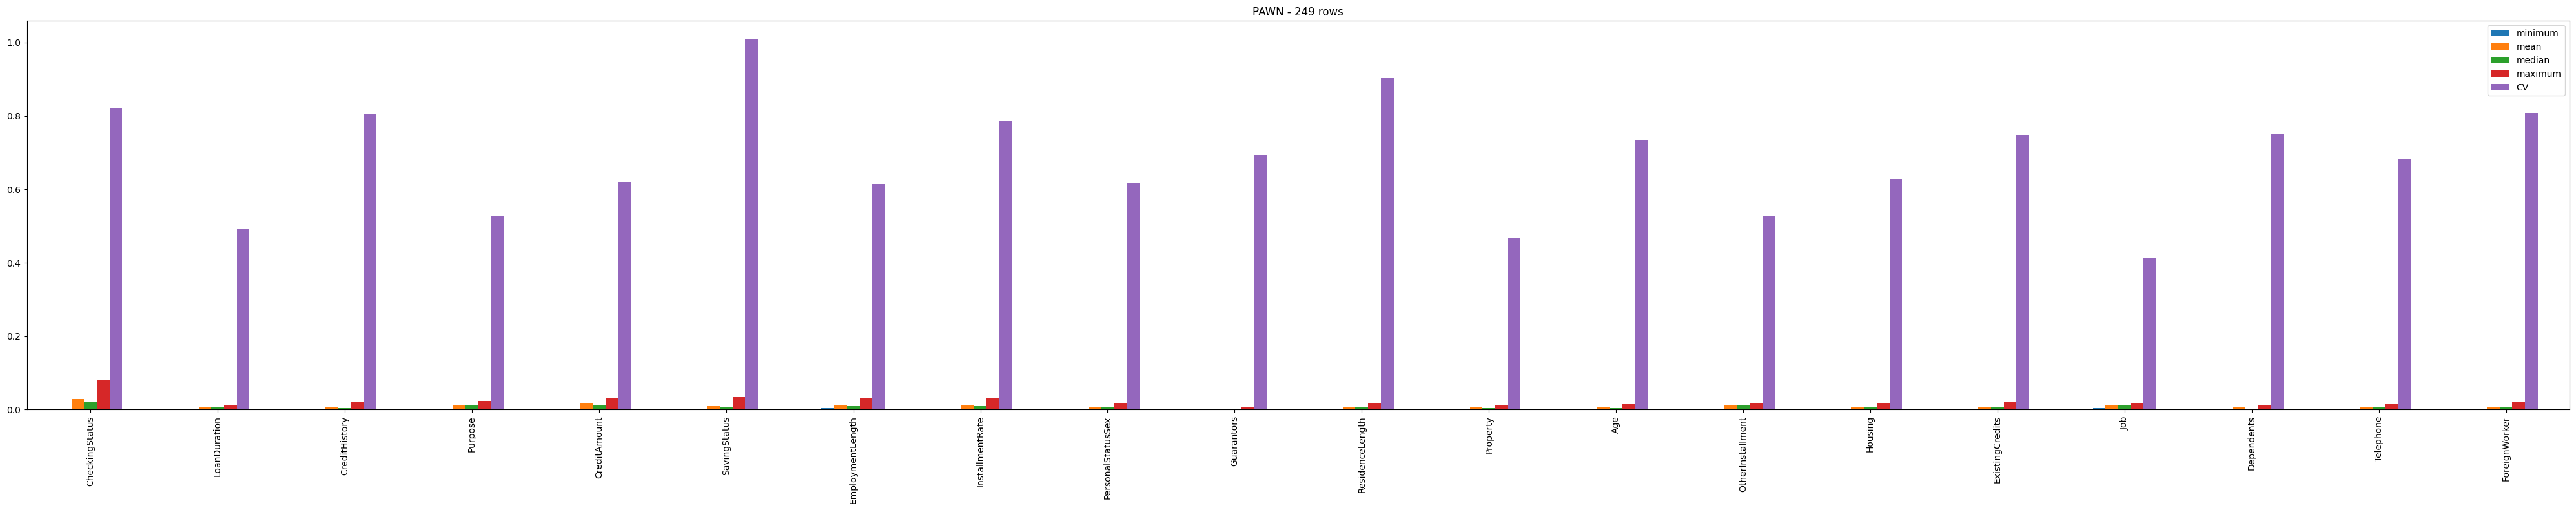

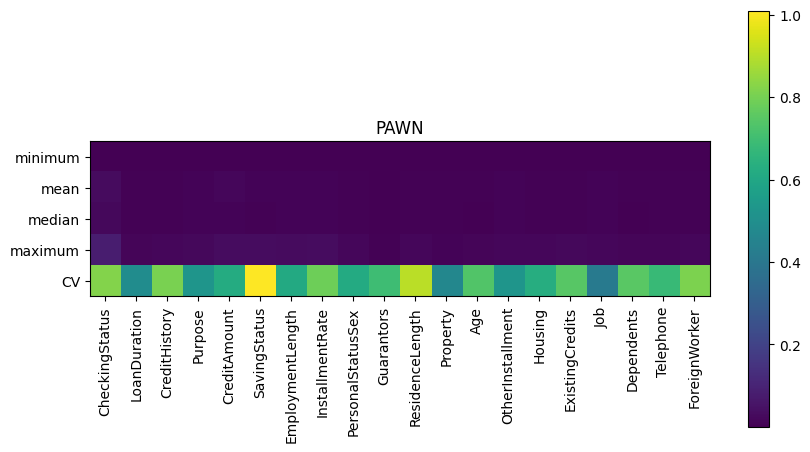

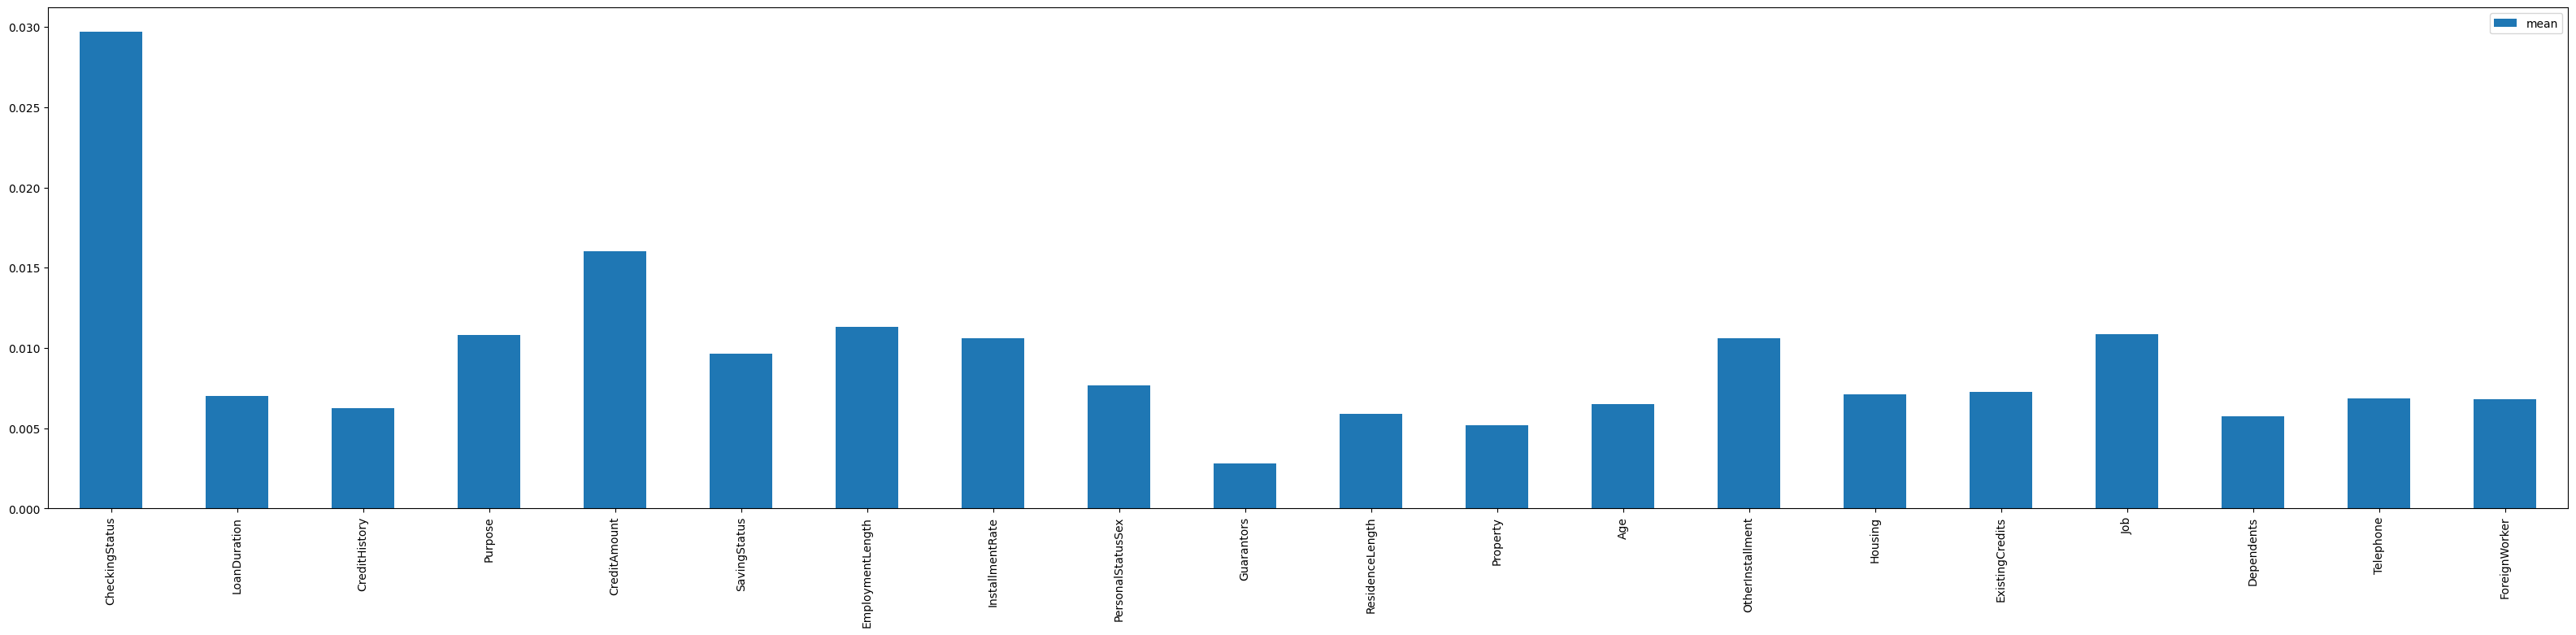

In [15]:
# === SALib PAWN Attempt ===
def loan_pawn(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_latin(32768).evaluate(loan_model, loan_data).analyze_pawn())
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"PAWN - {loan_rows} rows")
    plt.tight_layout() 

    sp.heatmap(title="PAWN")

    # only plot mean
    df = sp.to_df()
    df.plot.bar(y="mean", figsize=(40, 8))

loan_pawn(x_test)


In [16]:
%%timeit
loan_pawn(credit_training_features)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.004010  0.014582  0.014800  0.025590  0.464137
LoanDuration       0.000653  0.006546  0.005525  0.017723  0.712649
CreditHistory      0.000019  0.006302  0.005798  0.019555  0.917723
Purpose            0.000324  0.005656  0.005645  0.012554  0.704441
CreditAmount       0.000592  0.009611  0.008381  0.018352  0.645094
SavingStatus       0.000262  0.007767  0.005493  0.021404  0.858125
EmploymentLength   0.003094  0.008472  0.007324  0.014080  0.440593
InstallmentRate    0.001263  0.007118  0.004468  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.000104  0.010666  0.009126  0.028346  0.944500
LoanDuration       0.000812  0.007249  0.006610  0.019329  0.855542
CreditHistory      0.001179  0.007157  0.007324  0.013389  0.494961
Purpose            0.001325  0.008460  0.009307  0.012557  0.412393
CreditAmount       0.000263  0.012670  0.012054  0.030925  0.771410
SavingStatus       0.000653  0.004430  0.002369  0.017290  1.153938
EmploymentLength   0.001422  0.006010  0.005830  0.016277  0.728231
InstallmentRate    0.001727  0.009660  0.007131  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.002368  0.014124  0.014800  0.026240  0.494278
LoanDuration       0.000073  0.006586  0.006440  0.017015  0.694002
CreditHistory      0.000073  0.007682  0.007782  0.017388  0.808800
Purpose            0.000073  0.005853  0.005299  0.014269  0.760410
CreditAmount       0.002978  0.011955  0.013048  0.018383  0.353346
SavingStatus       0.000537  0.005866  0.003999  0.013500  0.817443
EmploymentLength   0.000379  0.006625  0.006024  0.015184  0.815042
InstallmentRate    0.001538  0.007182  0.005951  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.000445  0.013363  0.013307  0.033402  0.778895
LoanDuration       0.001666  0.007227  0.005751  0.021221  0.824818
CreditHistory      0.002911  0.008826  0.007038  0.017864  0.627505
Purpose            0.001118  0.007542  0.005360  0.022997  0.822072
CreditAmount       0.000165  0.011939  0.013093  0.021526  0.649390
SavingStatus       0.001971  0.009342  0.006886  0.021501  0.697652
EmploymentLength   0.000445  0.006031  0.004577  0.012717  0.594887
InstallmentRate    0.000751  0.007121  0.006103  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


input shape:  (32768, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	32768 samples
Outputs:
	1 outputs: ['Y']
	32768 evaluations
Analysis:
                    minimum      mean    median   maximum        CV
CheckingStatus     0.002003  0.012336  0.013307  0.023638  0.653870
LoanDuration       0.000195  0.007544  0.007934  0.015453  0.636974
CreditHistory      0.001416  0.007379  0.005658  0.015148  0.618709
Purpose            0.001355  0.006088  0.006604  0.010180  0.446177
CreditAmount       0.001025  0.012113  0.012054  0.031016  0.682739
SavingStatus       0.000171  0.007331  0.005493  0.024286  0.919605
EmploymentLength   0.002026  0.005878  0.003083  0.014213  0.738471
InstallmentRate    0.000806  0.008051  0.007173  0.0

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


## hihihihi

(20480, 20)
[[ 55.55306328  55.55306328  55.55306328 ...  55.55306328  55.55306328
   55.55306328]
 [117.31673516  56.03939141  56.52571953 ...  56.52571953  57.01204766
   57.49837578]
 [179.08040703  56.52571953  57.49837578 ...  57.49837578  58.47103203
   59.44368828]
 ...
 [118.4495734  116.99058903 115.53160465 ... 115.53160465 114.07262028
   65.38245785]
 [118.93590153 117.96324528 116.99058903 ... 116.99058903 116.01793278
    3.61878597]
 [119.42222965 118.93590153 118.4495734  ... 118.4495734  117.96324528
   58.1448859 ]]
(20480, 20)
[[947.57111031 947.57111031 947.57111031 ... 947.57111031 947.57111031
  947.57111031]
 [699.77228218 945.61993843 943.66876656 ... 943.66876656 941.71759468
  939.76642281]
 [451.97345406 943.66876656 939.76642281 ... 939.76642281 935.86407906
  931.96173531]
 ...
 [451.60722059 457.46073621 463.31425184 ... 463.31425184 469.16776746
  808.84981066]
 [449.65604871 453.55839246 457.46073621 ... 457.46073621 461.36307996
  941.35136121]
 [447.70

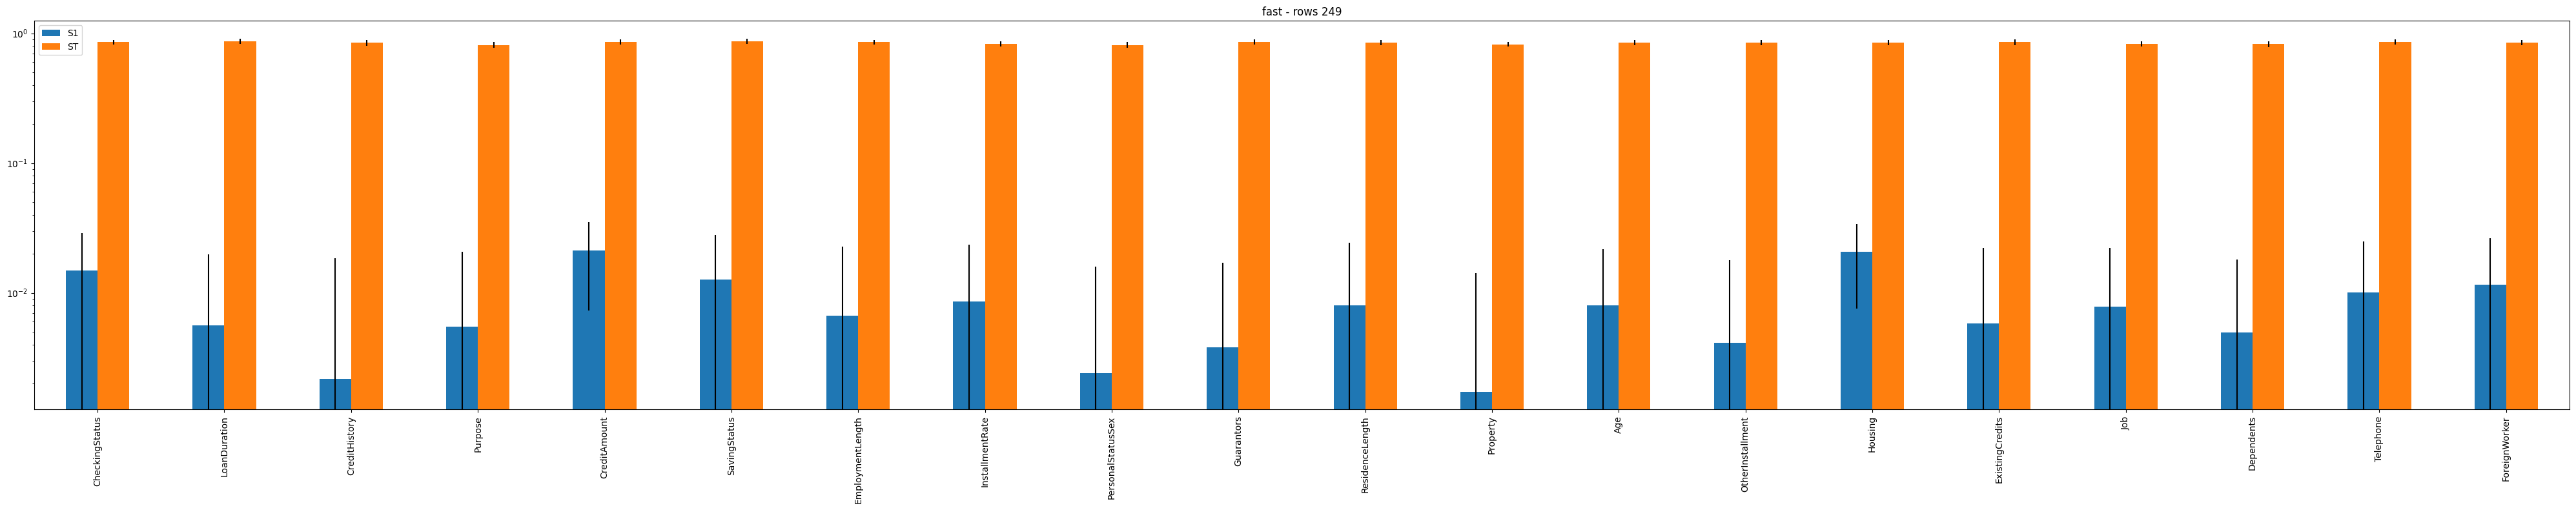

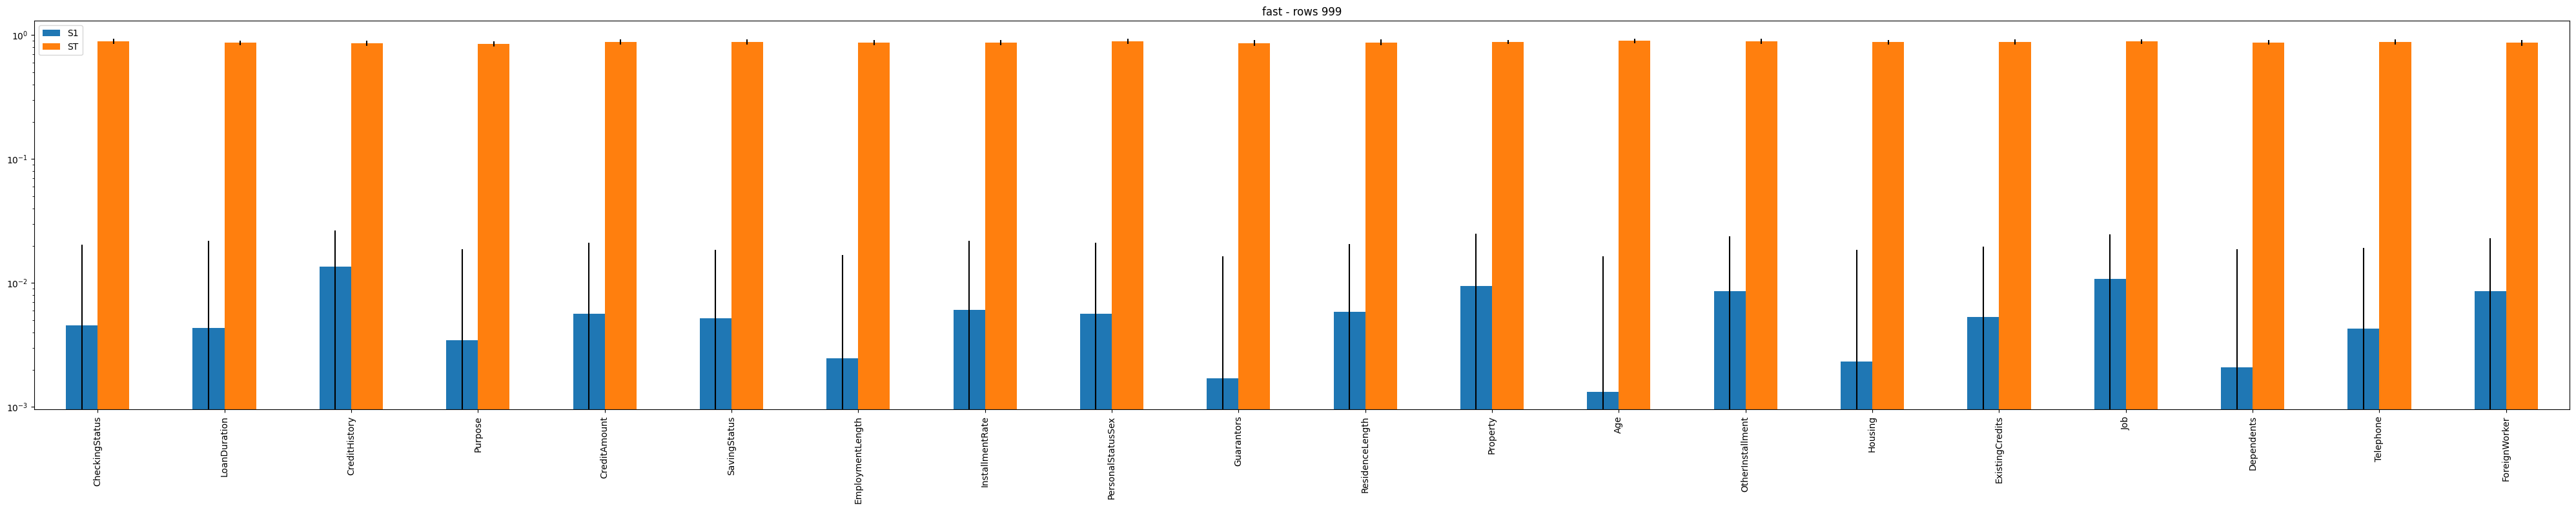

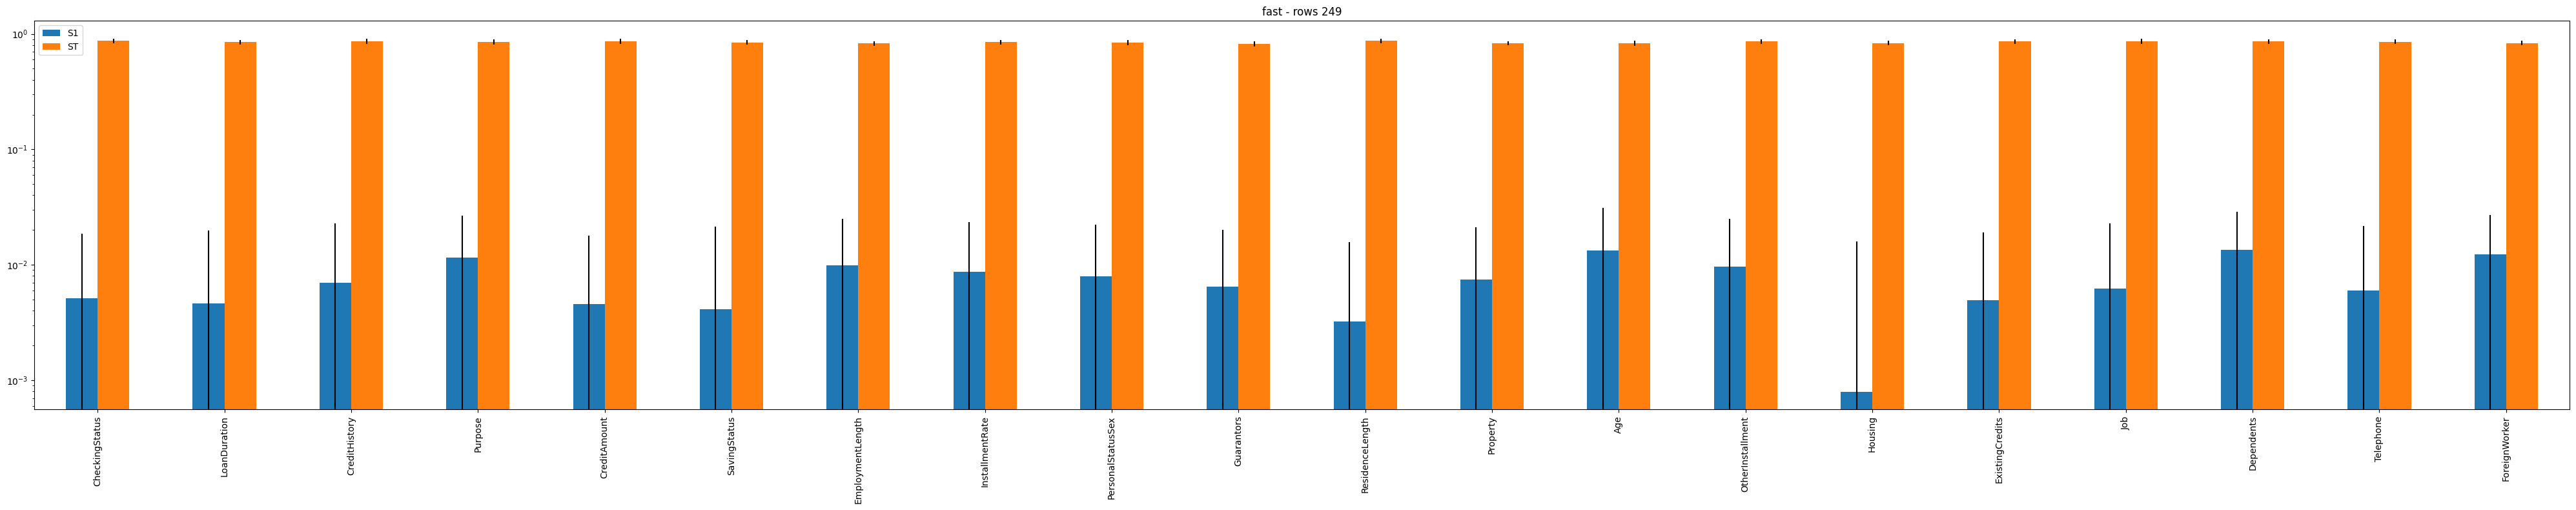

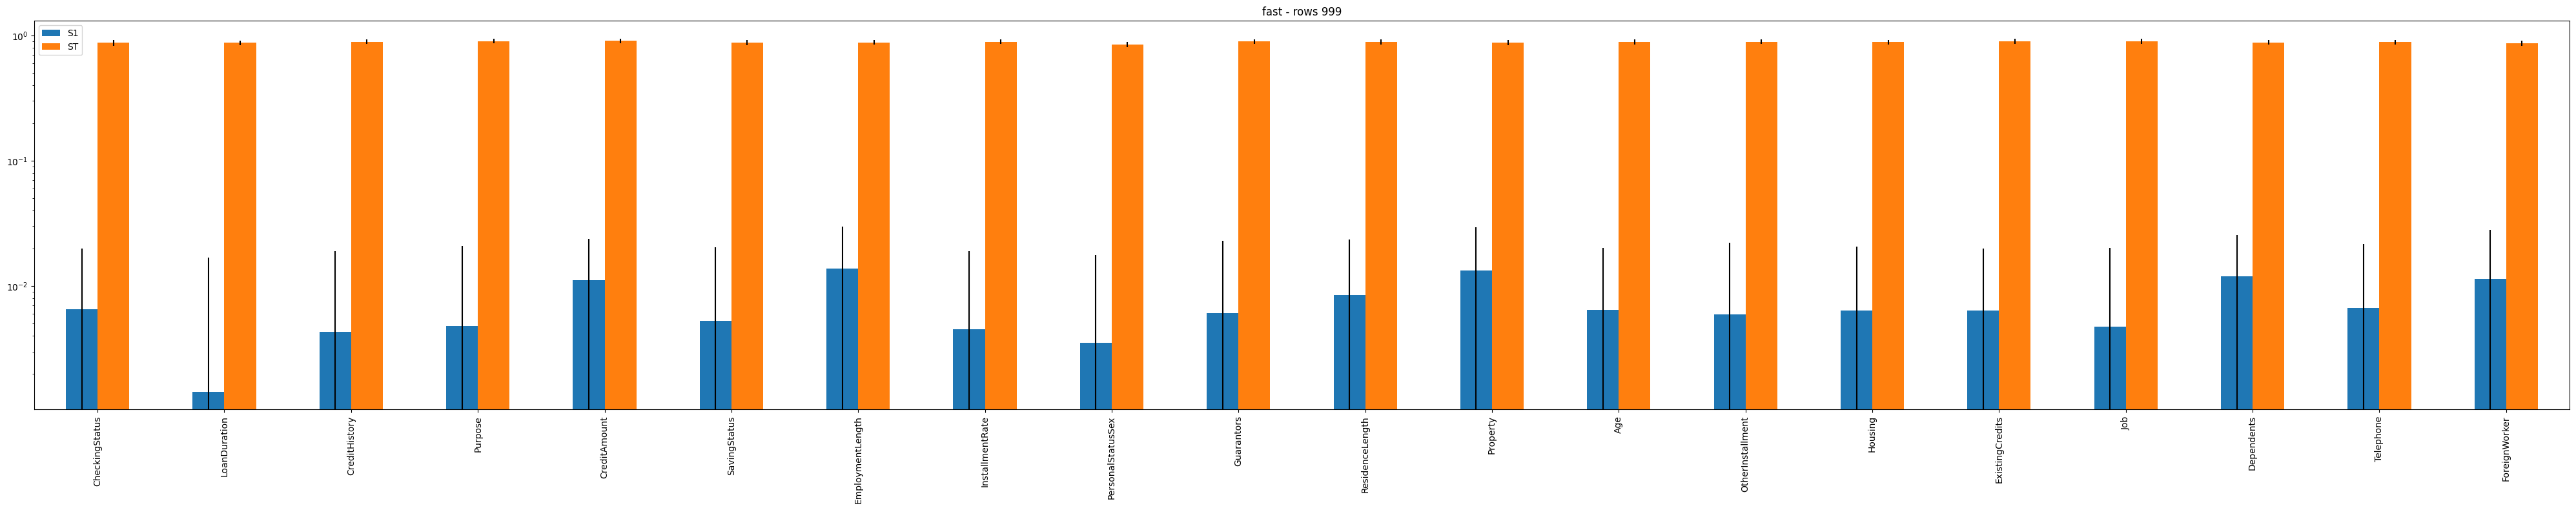

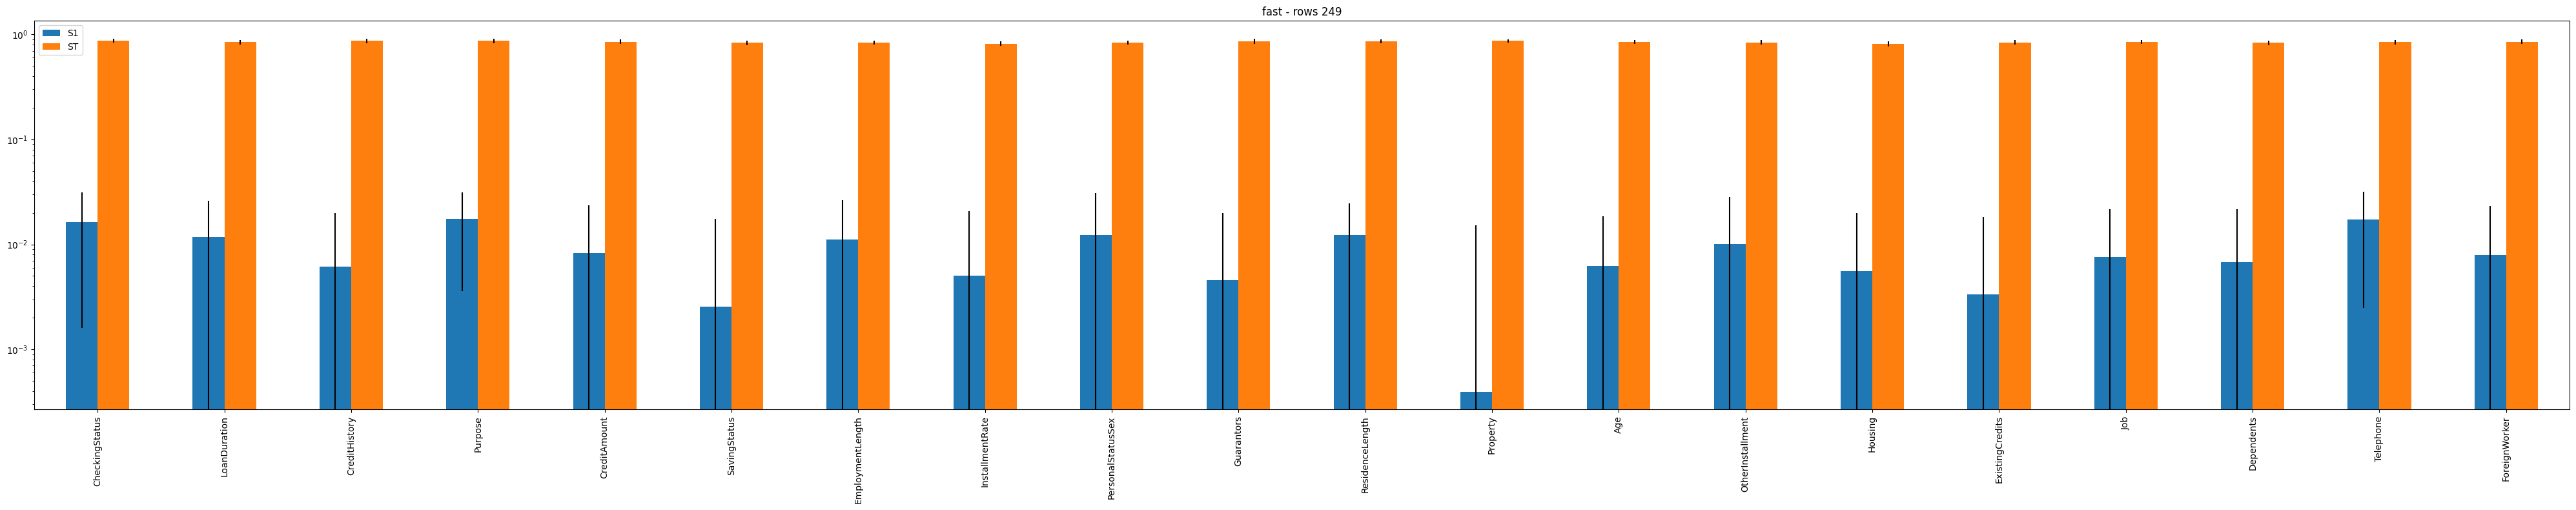

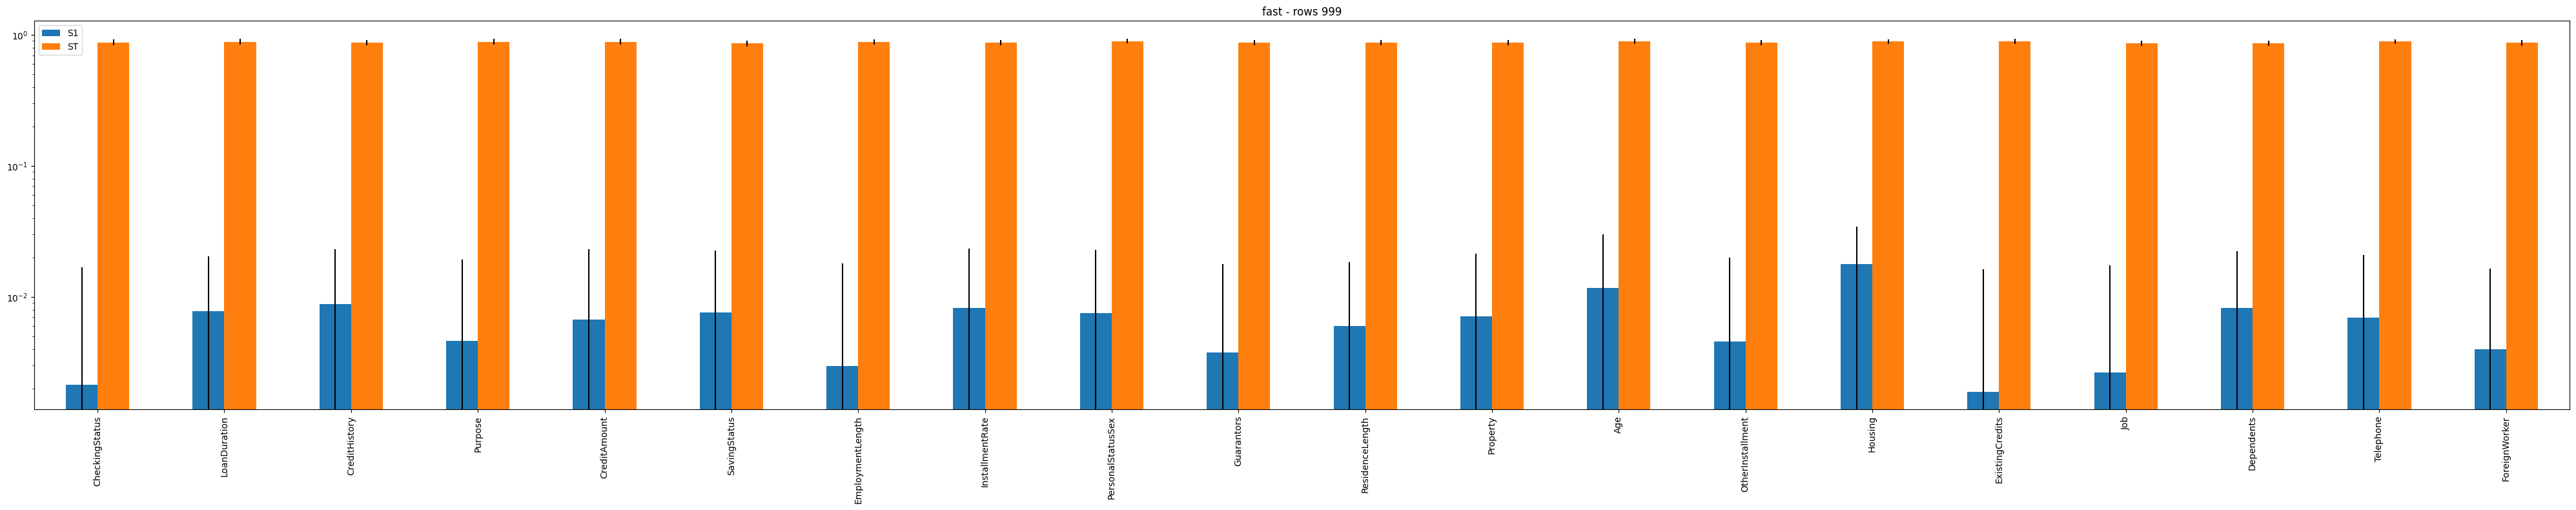

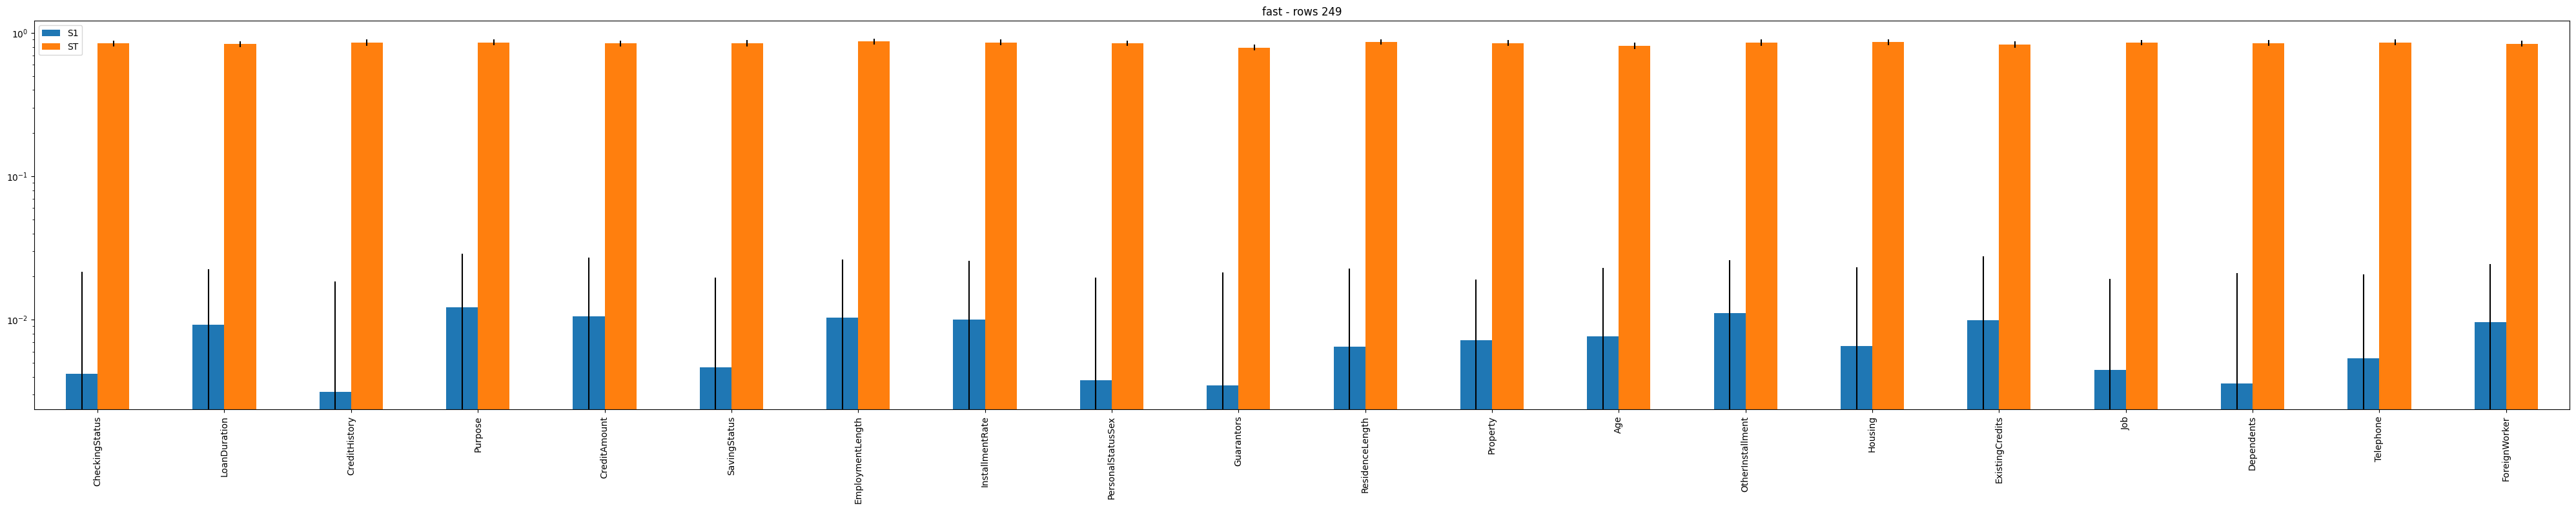

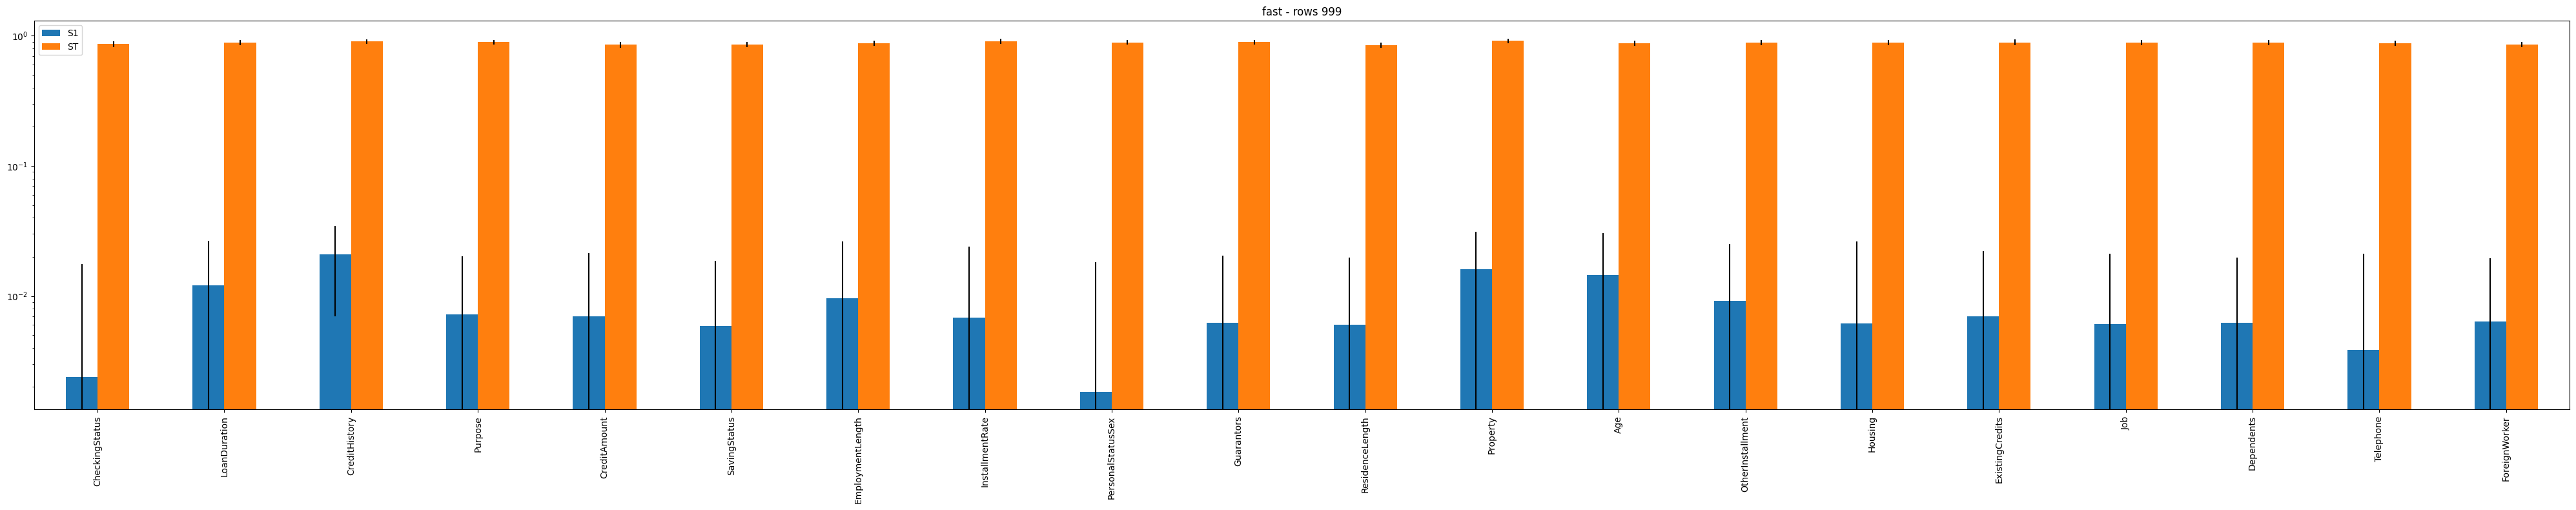

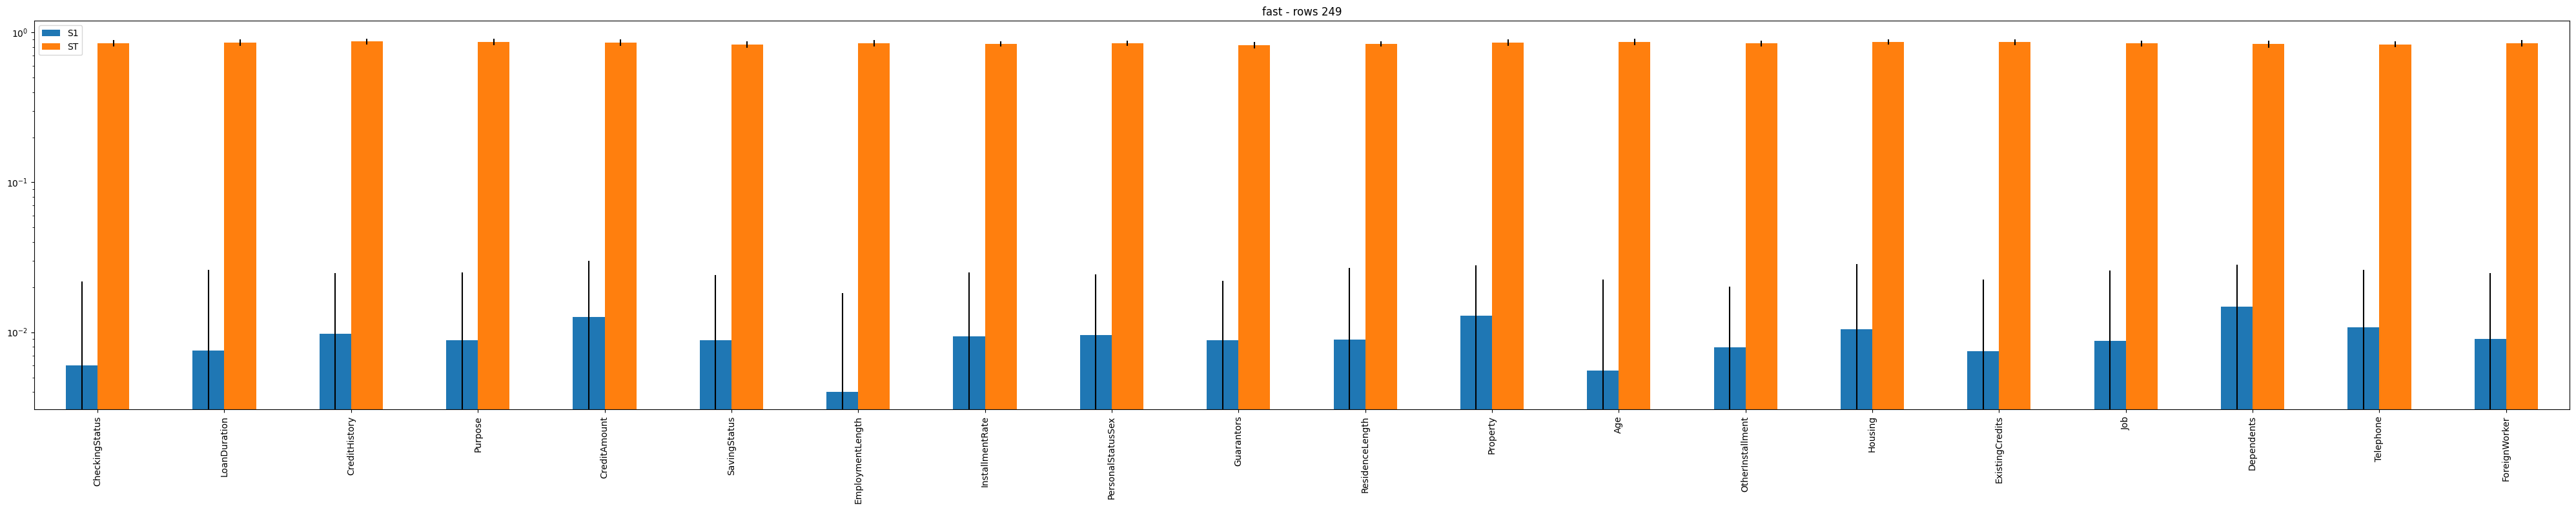

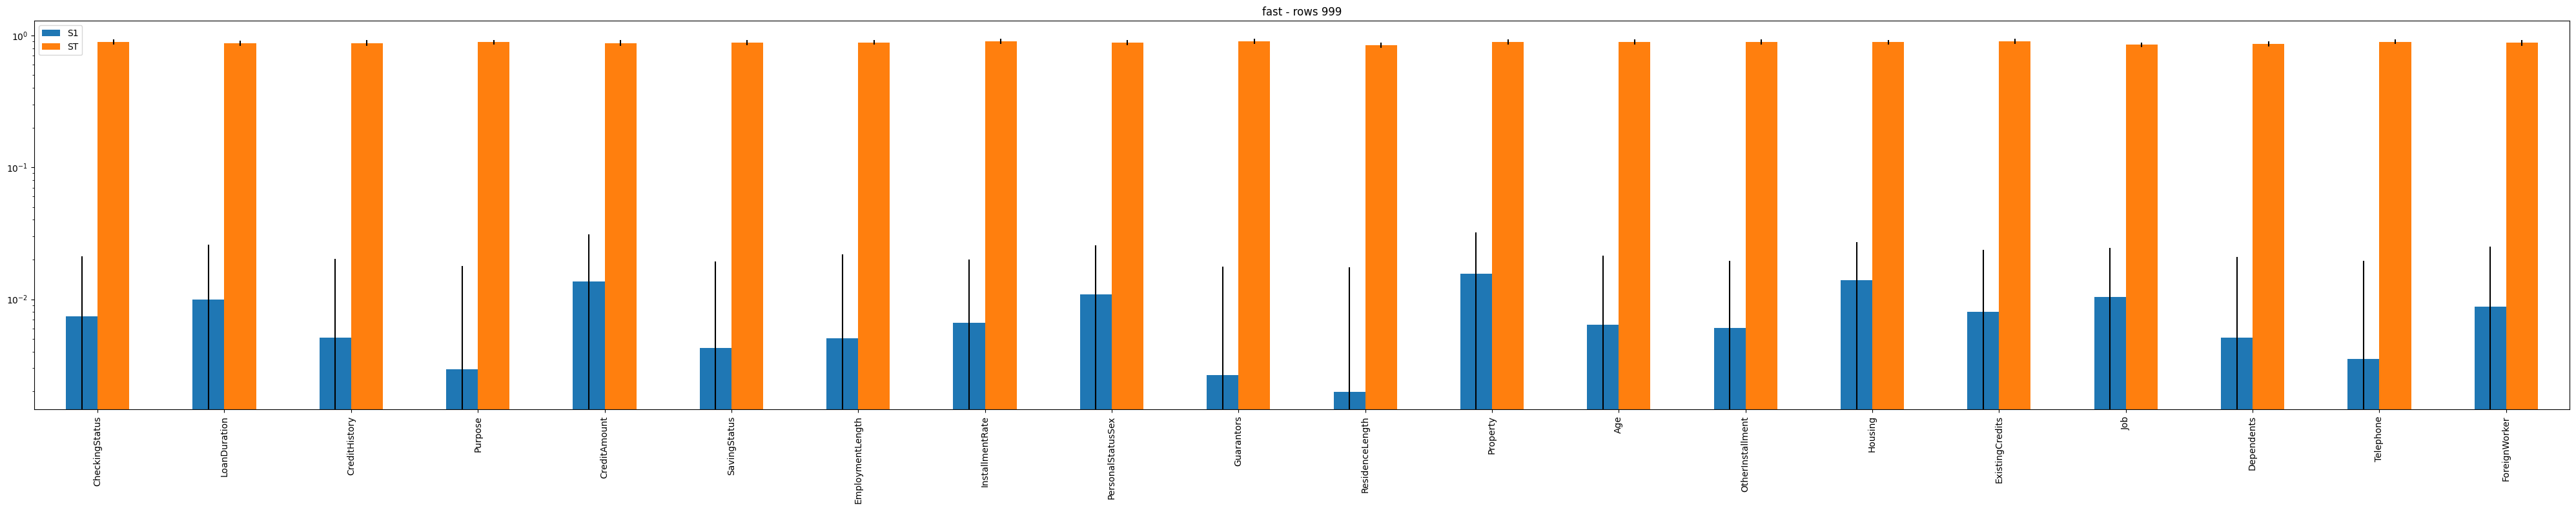

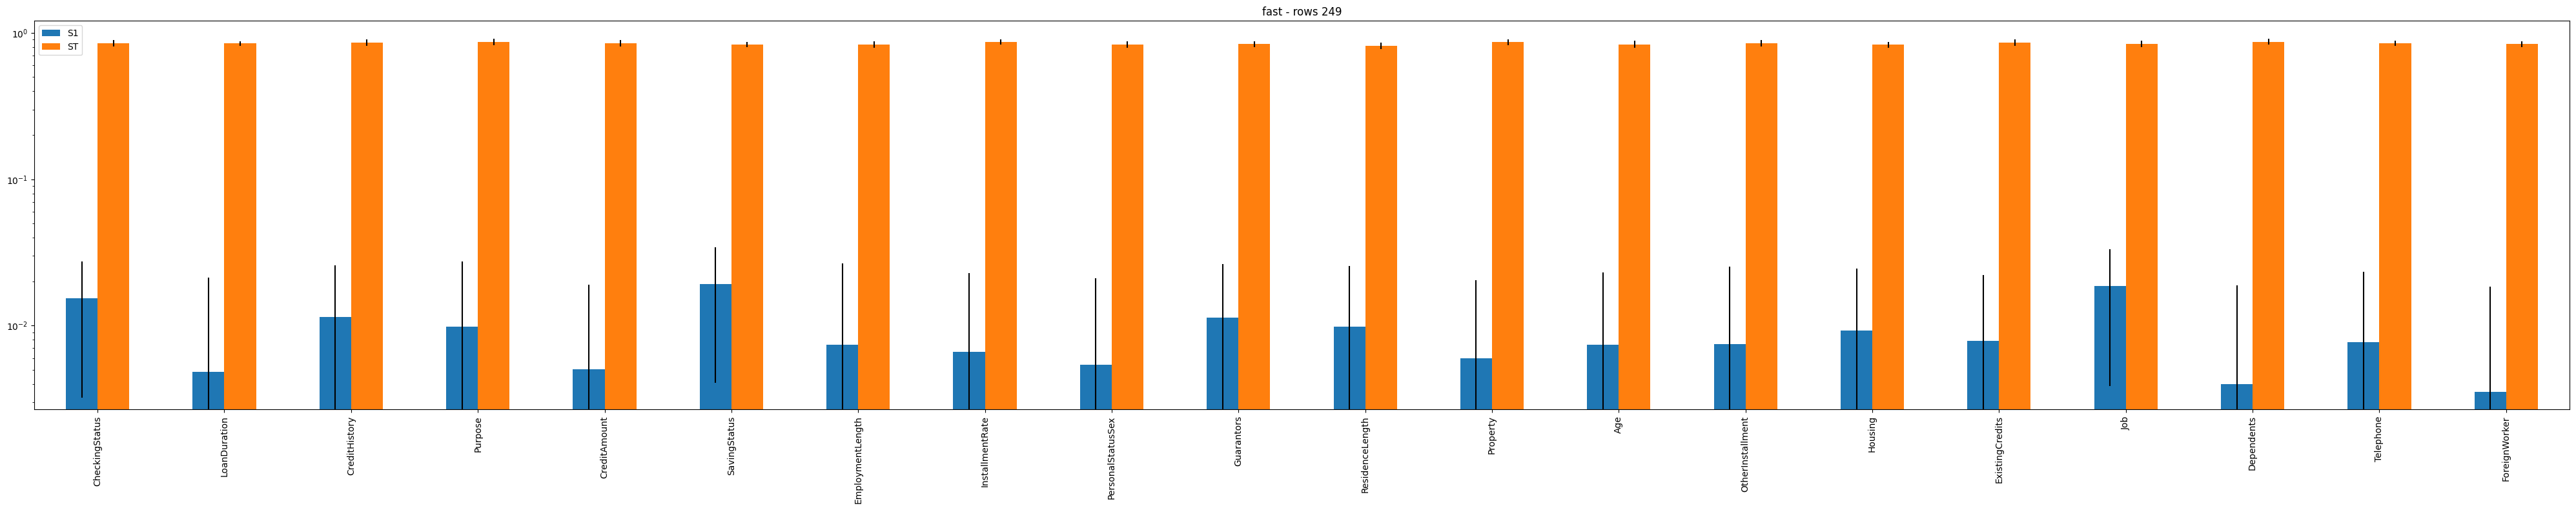

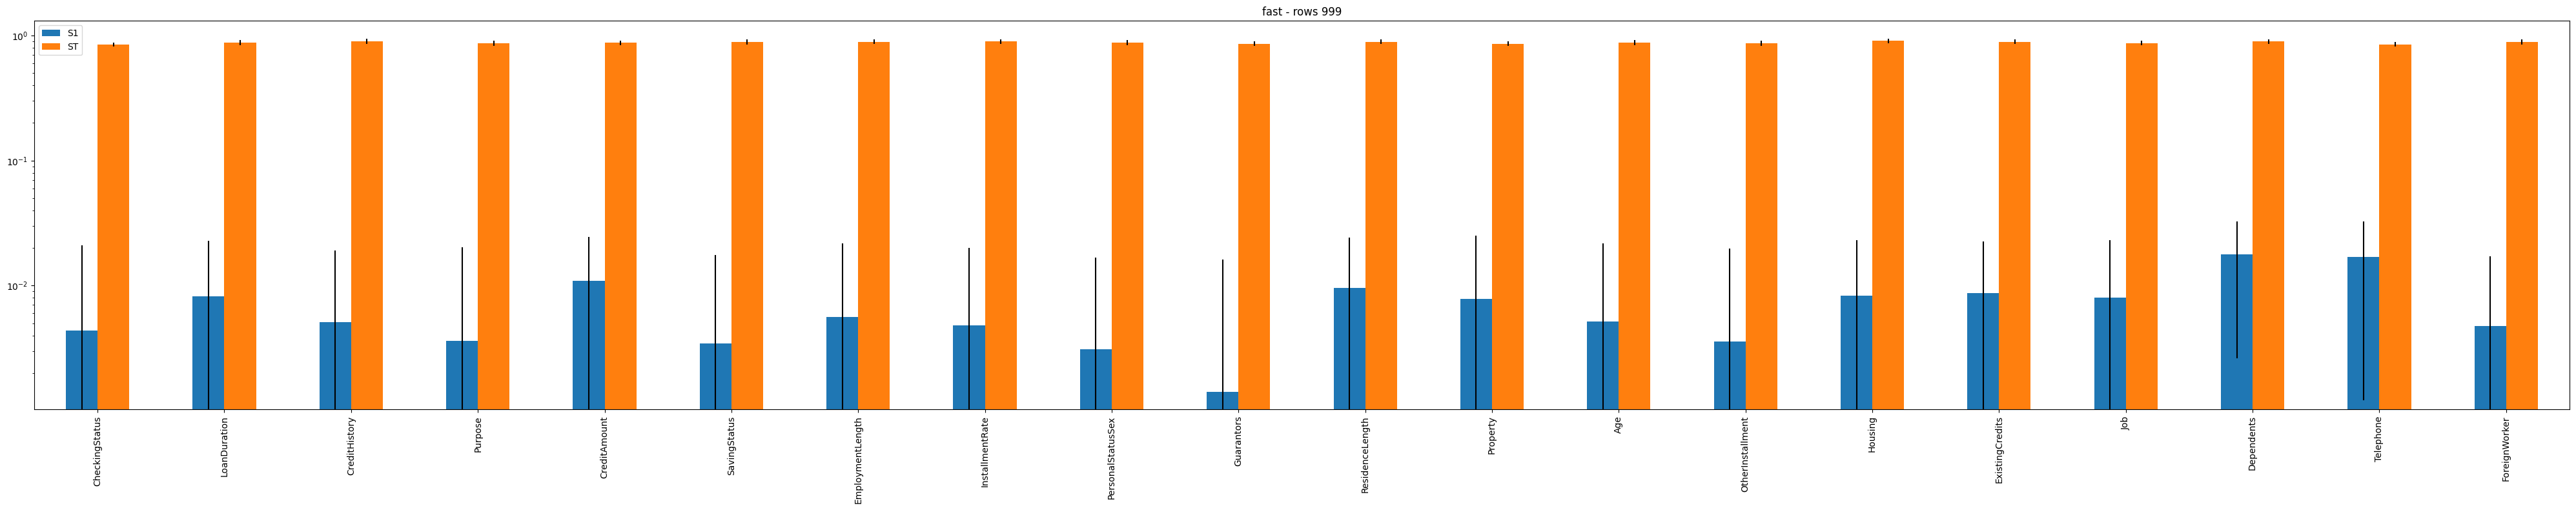

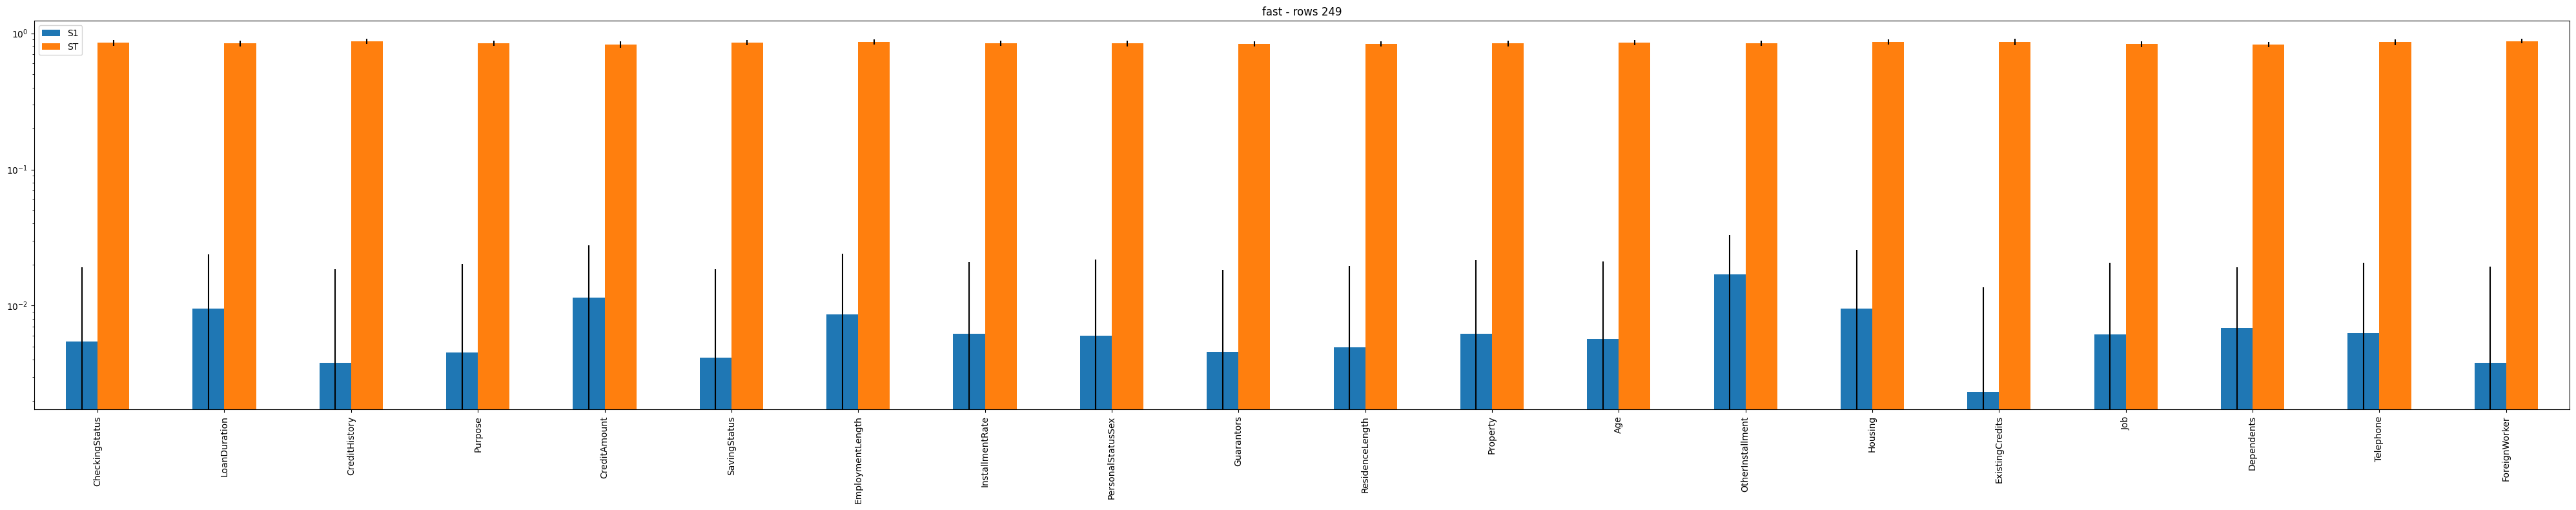

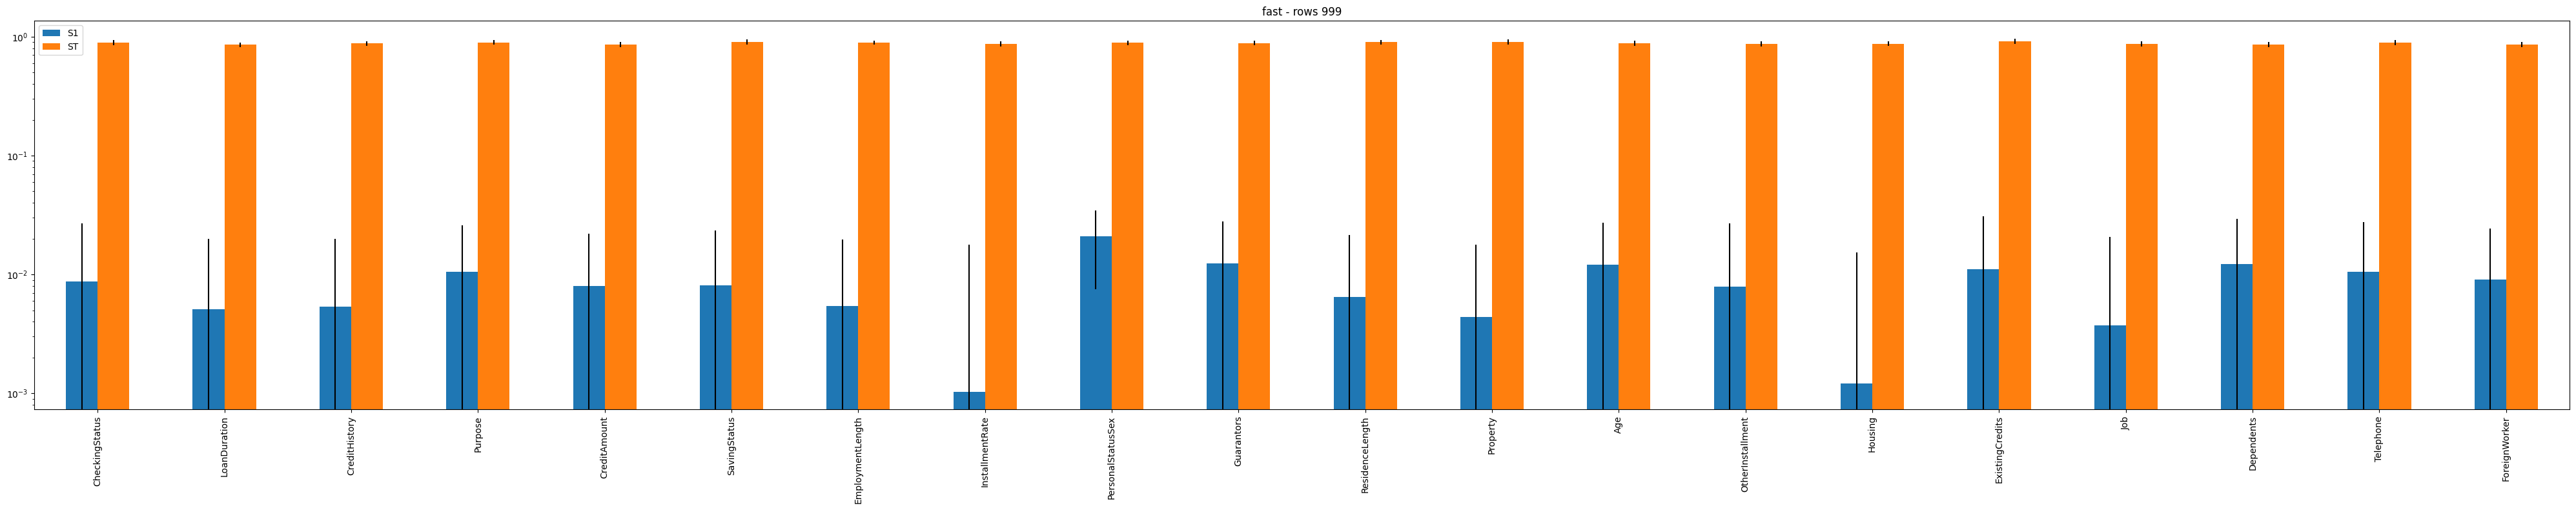

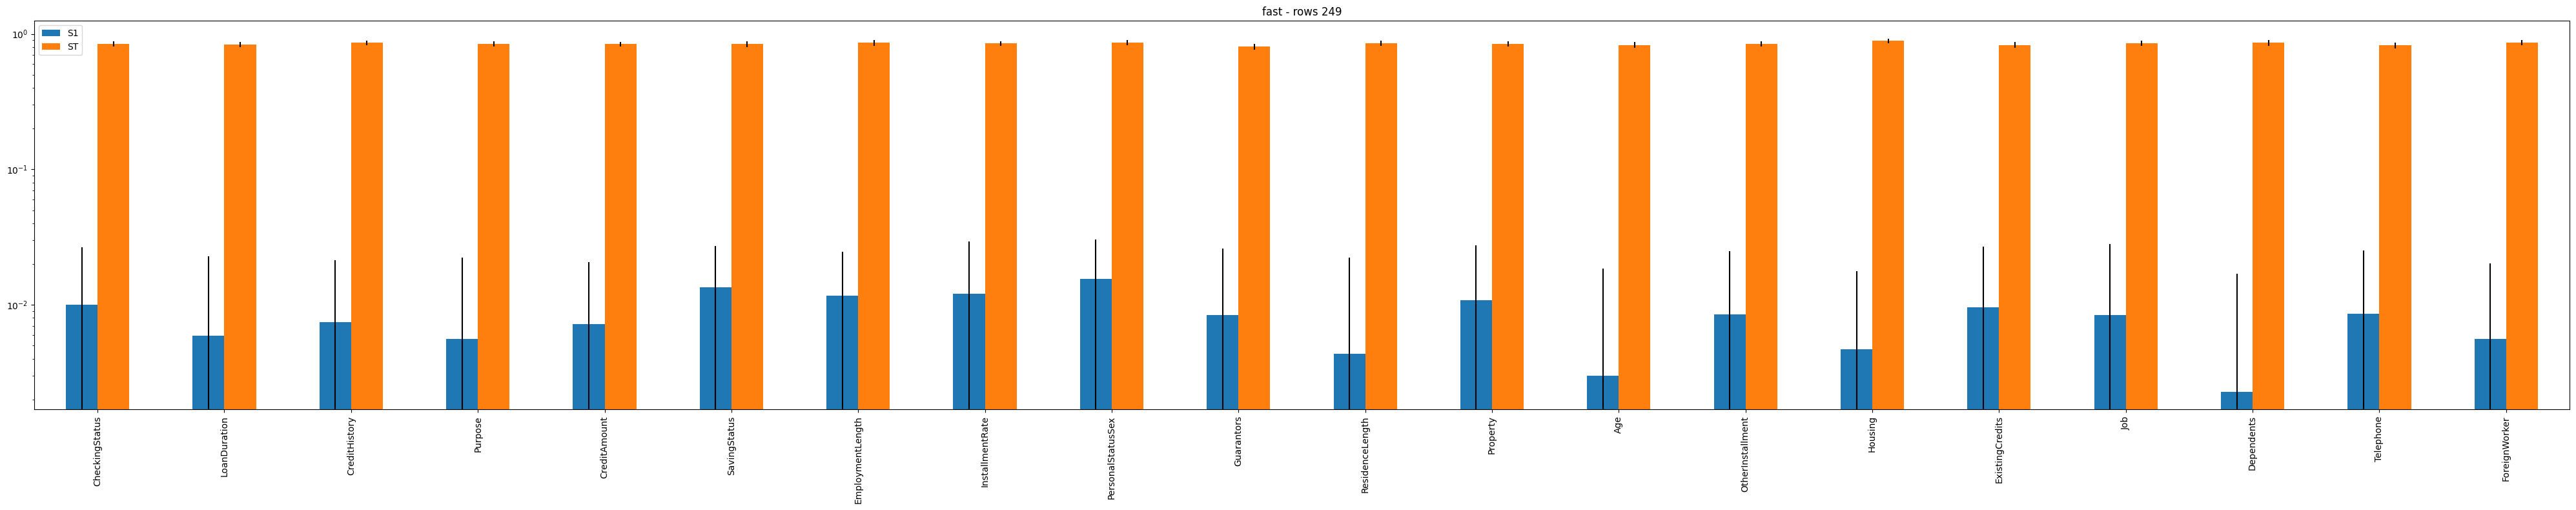

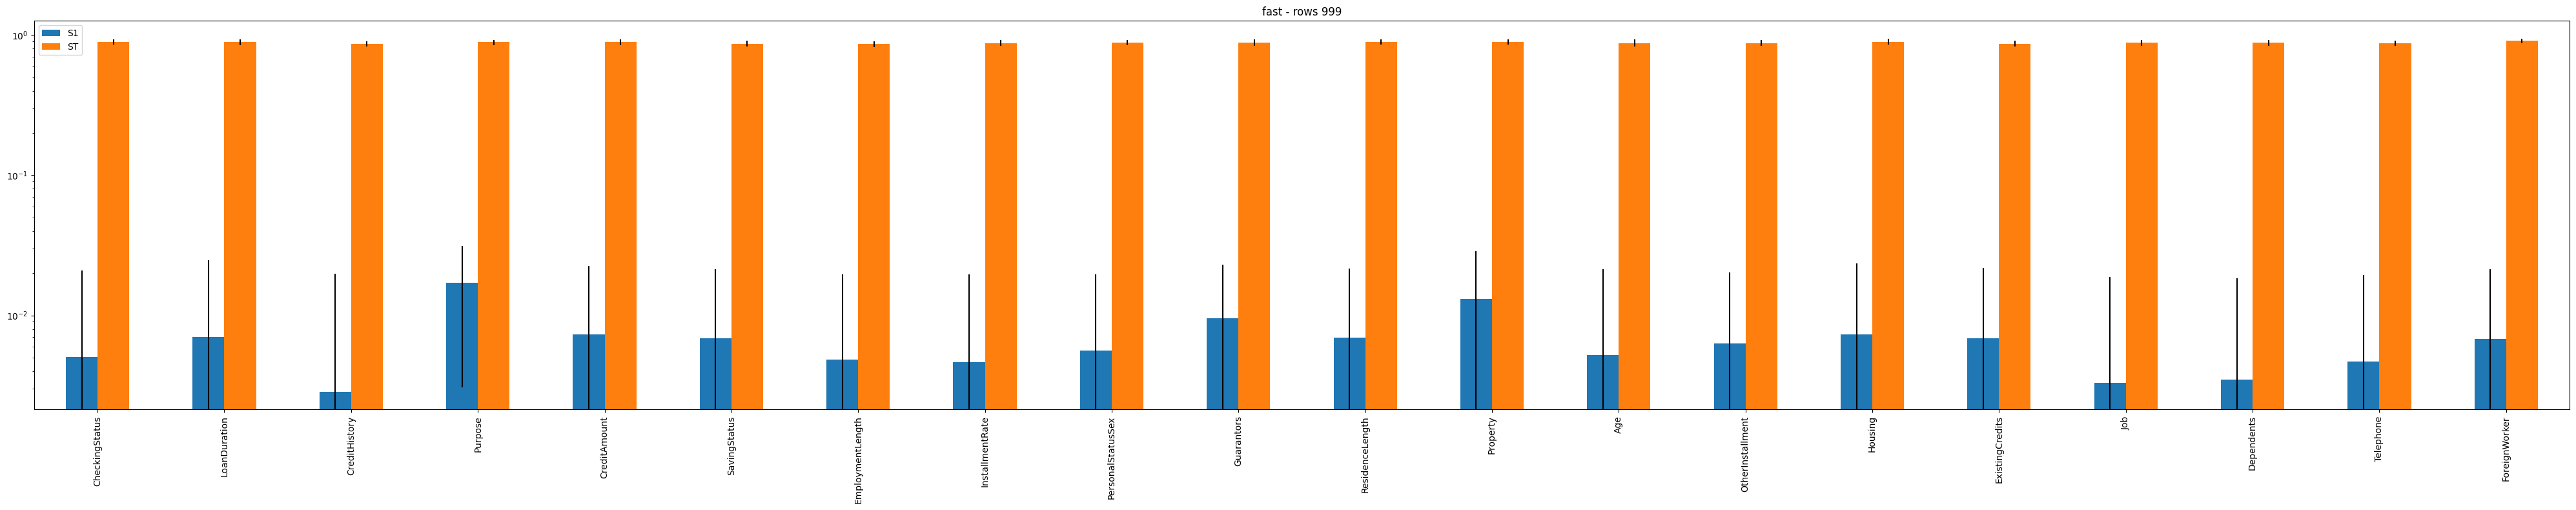

In [75]:
%%timeit
# === SALib functions ===
def loan_fast(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_fast(1024).evaluate(loan_model, loan_data).analyze_fast())
    print(sp.samples)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"fast - rows {loan_rows}")
    plt.tight_layout() 

loan_fast(x_test)
loan_fast(credit_training_features)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


(1024, 20)
[[217.19442945 155.2033172  159.47581879 ... 173.86322959 170.47000381
   85.62502141]
 [ 48.55216768  94.82460144  77.86349978 ... 161.43230689 182.63292812
  159.43882487]
 [ 48.99713683  21.58863256  15.78605242 ... 164.72198584 197.31198663
   81.51843172]
 ...
 [ 68.496063   188.8185285  145.38569821 ...   1.50374638  55.85313752
   86.63446386]
 [ 46.59077266 244.91345001  72.05403529 ... 233.41467585  28.81276169
   19.02075404]
 [144.66804739 168.81813747  77.10308776 ... 120.36247337  16.00277181
   30.87656014]]
(1024, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


[[594.07351777   8.88790517 559.05890172 ... 419.2627282    9.96397137
   54.45163861]
 [ 23.54176249 629.34982682 719.97146076 ... 367.13139469 623.16525424
  641.07952027]
 [498.14631064 638.33040435  90.18786915 ... 109.58269589 914.6538441
  899.59465965]
 ...
 [475.08659147 540.67075283 714.89614471 ... 921.34917905  15.36053825
  563.80210792]
 [367.90872965 728.49080699 988.34998676 ... 952.0719775   18.22317578
  896.05821137]
 [451.89378518 268.54375298 145.03405997 ... 379.9939331    7.01821258
  857.59750288]]


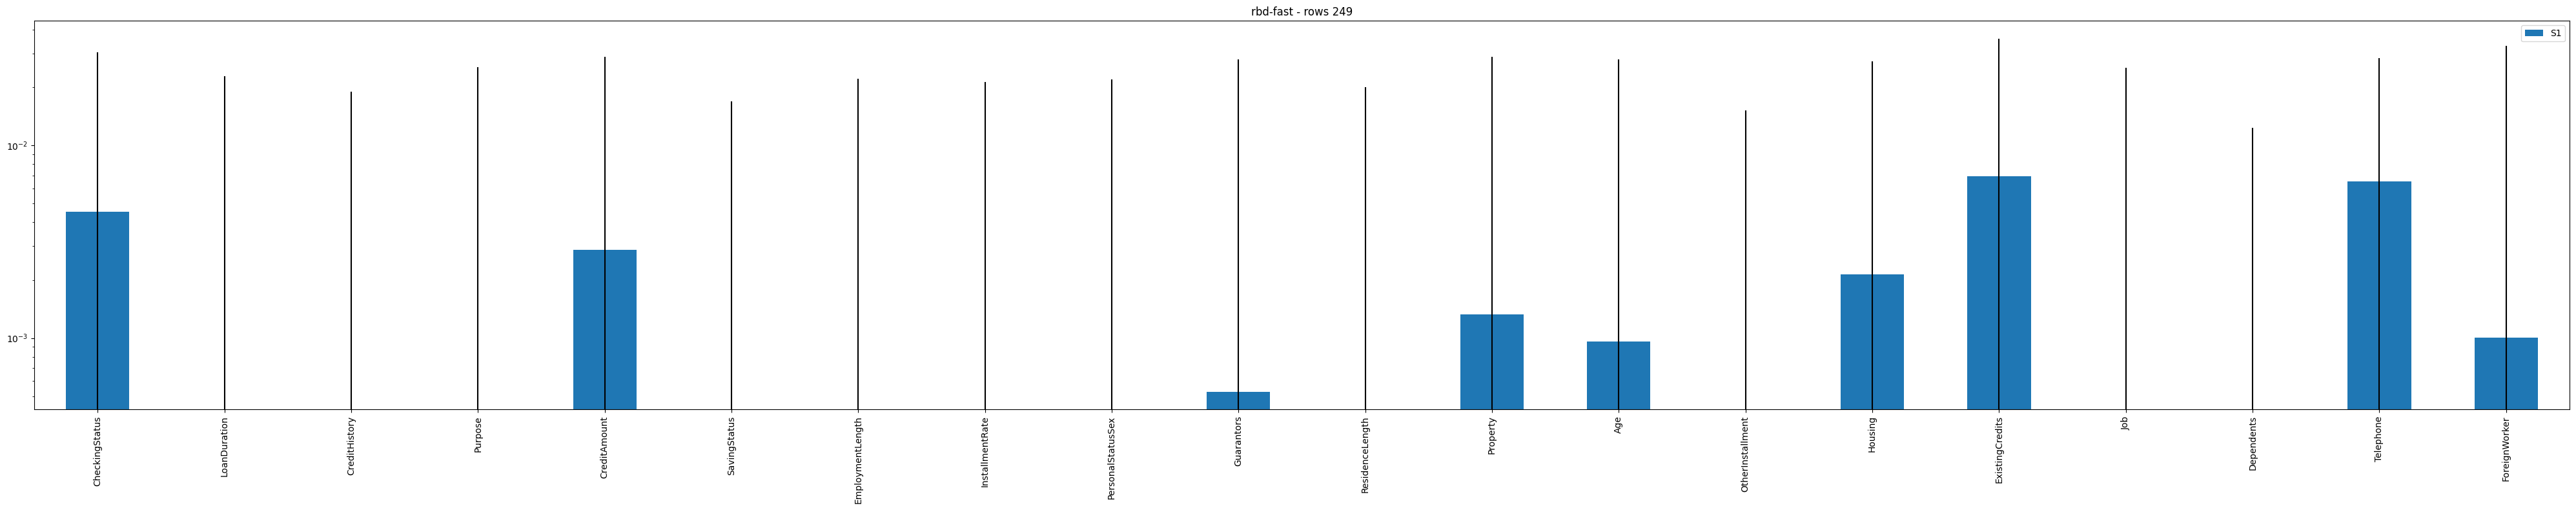

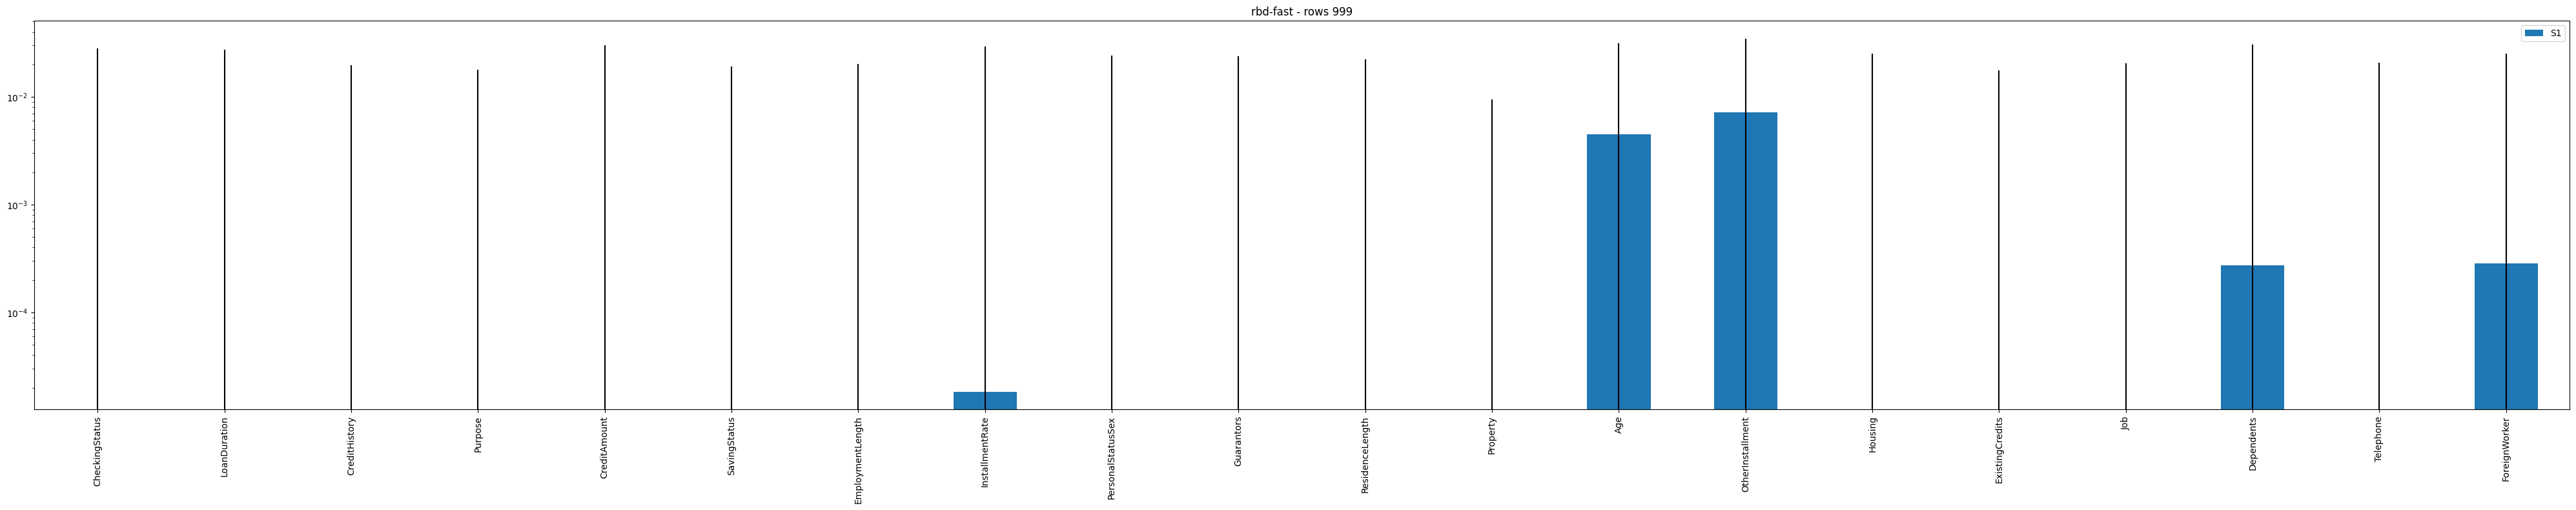

In [63]:
# === SALib functions ===
def loan_rbd_fast(loan_data: list):
    loan_rows = len(loan_data) - 1
    sp = ProblemSpec({
        'names': attributes[0:20],
        'bounds': [[0, loan_rows]]*len(attributes[0:20]),
    })

    (sp.sample_latin(1024).evaluate(loan_model, loan_data).analyze_rbd_fast())
    print(sp.samples)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"rbd-fast - rows {loan_rows}")
    plt.tight_layout() 

loan_rbd_fast(x_test)
loan_rbd_fast(credit_training_features)


(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.631483  0.073388
LoanDuration       0.149562  0.035697
CreditHistory      0.282506  0.052904
Purpose            0.119096  0.036756
CreditAmount       0.288045  0.056631
SavingStatus       0.202185  0.042616
EmploymentLength   0.171719  0.039283
InstallmentRate    0.221573  0.053542
PersonalStatusSex  0.116326  0.033621
Guarantors         0.052624  0.022379
ResidenceLength    0.013848  0.010931
Property           0.171719  0.042146
Age                0.083090  0.032461
OtherInstallment   0.102478  0.033745
Housing            0.10524

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

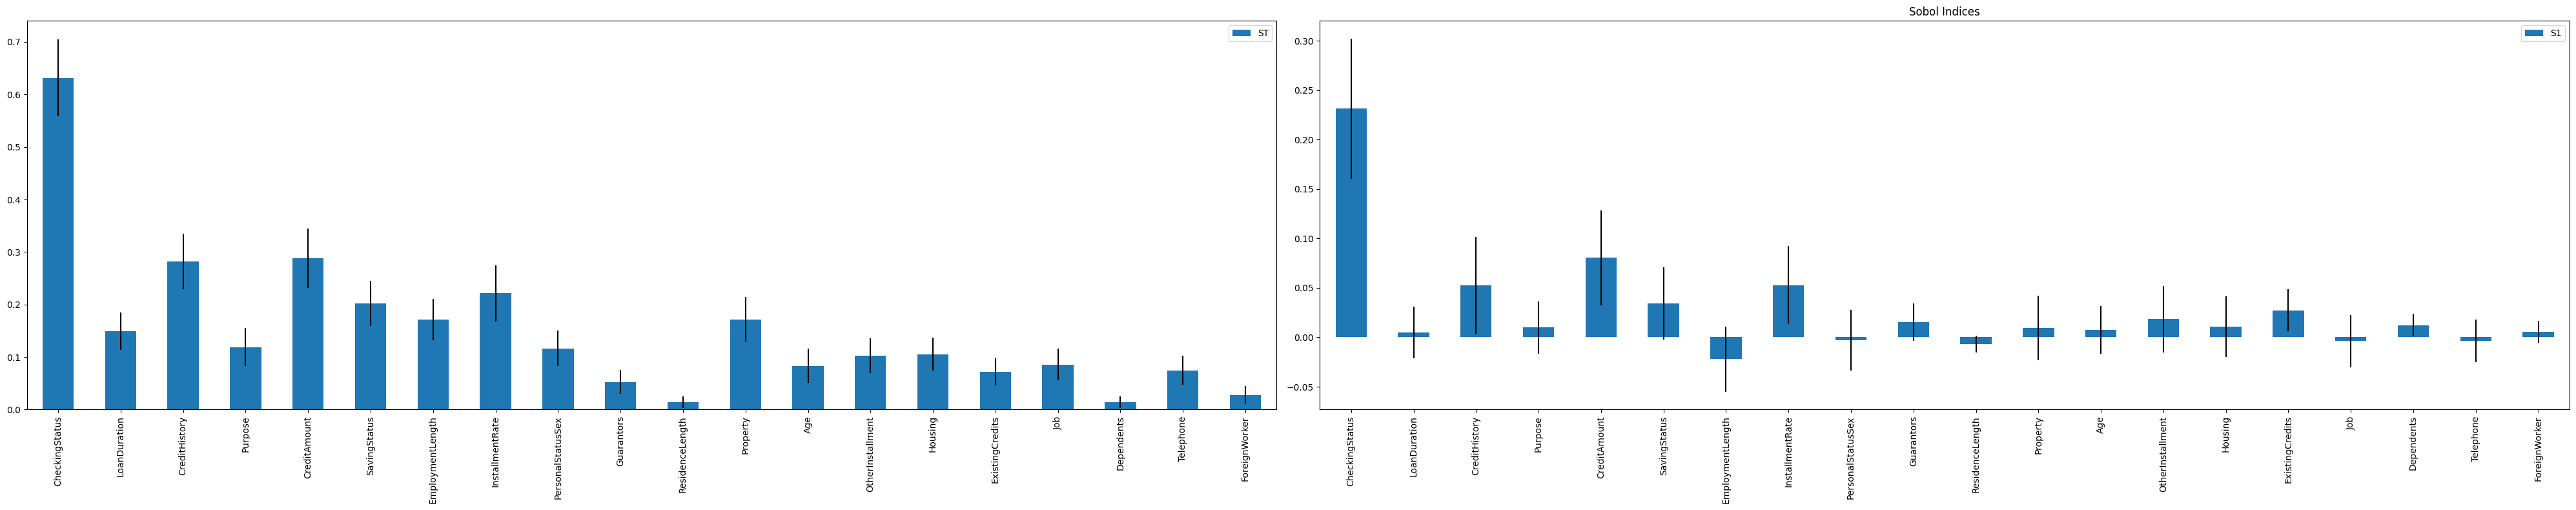

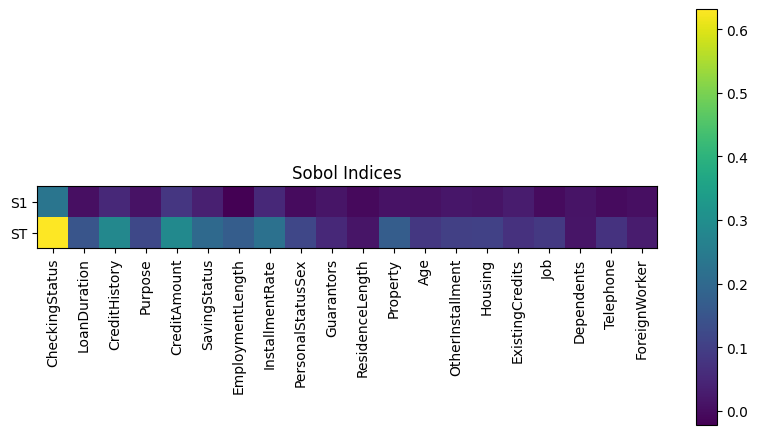

In [22]:
# === SALib functions? ===

def model_wrapper(X: np.ndarray, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    print(X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(x_test[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

# === SALib Attempt ===
sp = ProblemSpec({
    'names': attributes[0:20],
    'bounds': [[0, 250]]*len(attributes[0:20]),
})

(sp.sample_sobol(1024, calc_second_order=False).evaluate(model_wrapper).analyze_sobol(calc_second_order=False))
print(sp)

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(40, 8)
plt.title(label="Sobol Indices")
plt.tight_layout() 

sp.heatmap(title="Sobol Indices")


(22528, 20)


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	20 parameters: ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'Purpose', 'CreditAmount', 'SavingStatus', 'EmploymentLength', 'InstallmentRate', 'PersonalStatusSex', 'Guarantors', 'ResidenceLength', 'Property', 'Age', 'OtherInstallment', 'Housing', 'ExistingCredits', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']
	22528 samples
Outputs:
	1 outputs: ['Y']
	22528 evaluations
Analysis:
                         ST   ST_conf
CheckingStatus     0.608518  0.075676
LoanDuration       0.169537  0.041609
CreditHistory      0.278526  0.053756
Purpose            0.142290  0.043544
CreditAmount       0.278526  0.051523
SavingStatus       0.196785  0.046483
EmploymentLength   0.196785  0.042144
InstallmentRate    0.251279  0.048485
PersonalStatusSex  0.112016  0.044444
Guarantors         0.048439  0.024402
ResidenceLength    0.003027  0.005427
Property           0.193757  0.045684
Age                0.084769  0.028291
OtherInstallment   0.105961  0.033334
Housing            0.09385

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

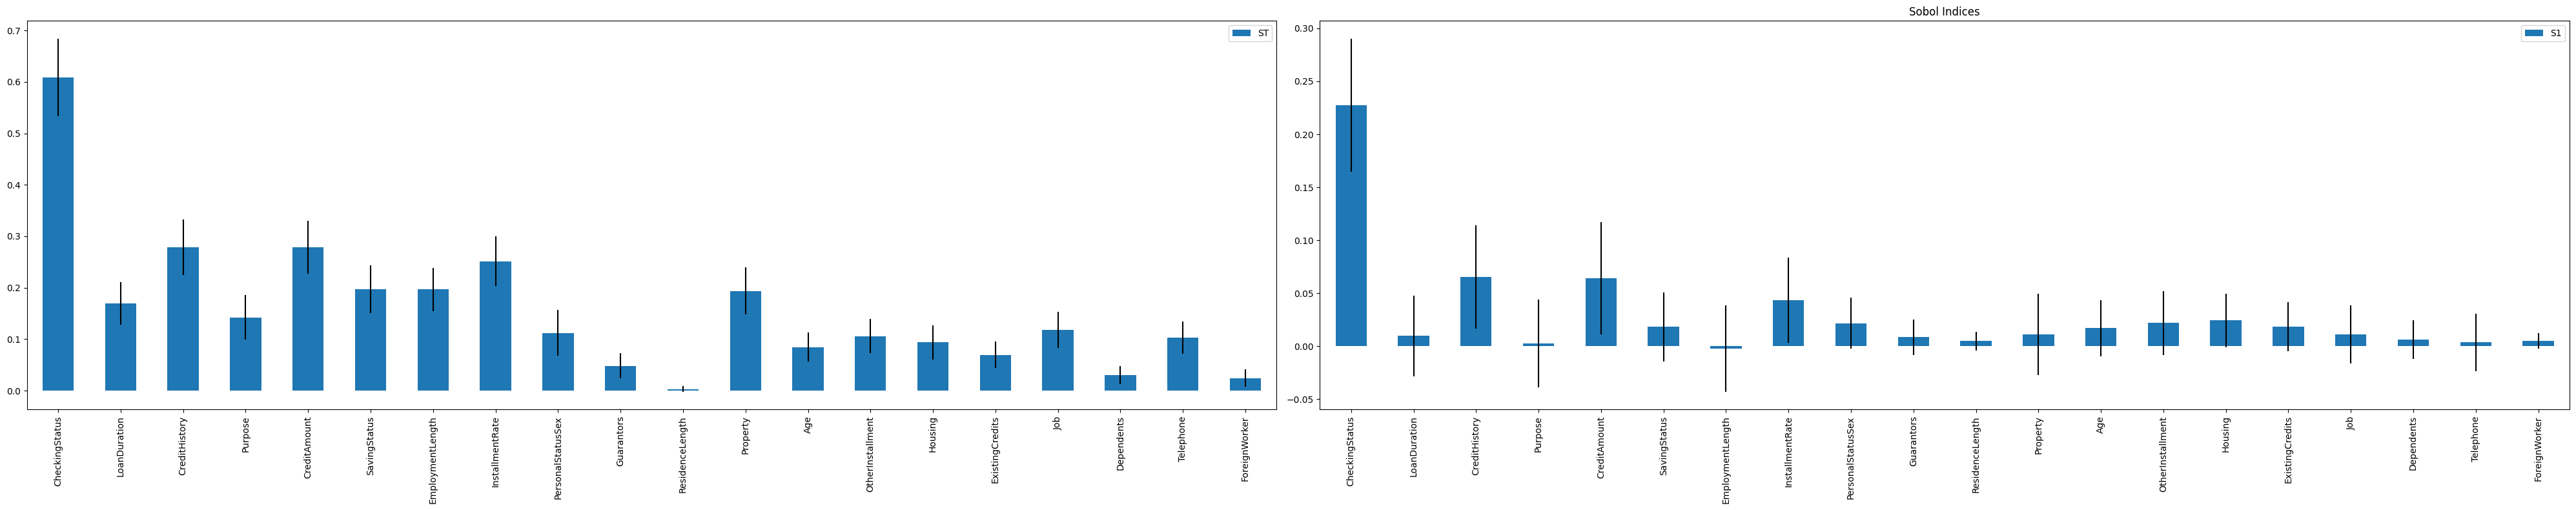

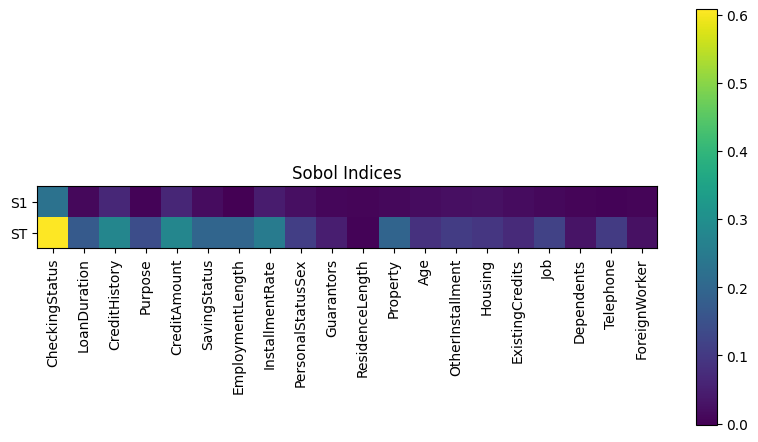

In [24]:
# === SALib functions? ===

def model_wrapper(X: np.ndarray, model=logistic_regression_model):
    # https://waterprogramming.wordpress.com/2014/02/11/extensions-of-salib-for-more-complex-sensitivity-analyses/
    # X: (rows, cols) each val is [0, size of x_test (250)] so each val represents row in x_test, col represents col in x_test
    # x_test: (rows, cols)
    print(X.shape)

    model_input = np.empty(shape=(X.shape[0], X.shape[1]))
    Y = np.ones(X.shape[0])
    
    # converting sample to south german credit values (x_test)
    for r_i in range(X.shape[0]):
        for c_i in range(X.shape[1]):
            new_row = math.floor(X[r_i][c_i])
            model_input[r_i][c_i] = int(credit_training_features[new_row][c_i])

    # evaluate model
    # model = logistic_regression_model
    # y_a = model.predict(matrix_a)
    # input: 2D array - [[21 attributes], [21 attributes], ...]
    Y = model.predict(model_input)
    return Y

# === SALib Attempt ===
sp = ProblemSpec({
    'names': attributes[0:20],
    'bounds': [[0, 1000]]*len(attributes[0:20]),
})

(sp.sample_sobol(1024, calc_second_order=False).evaluate(model_wrapper).analyze_sobol(calc_second_order=False))
print(sp)

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(40, 8)
plt.title(label="Sobol Indices")
plt.tight_layout() 

sp.heatmap(title="Sobol Indices")
